# Social Network Analysis - Amber Heard Case - YouTube

## Table of Contents
<ul>
<li><a href="#intro"><b>Introduction</b></a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>YouTube - Social Network Analysis on Amber Heard's Case 

In [1]:
import pandas as pd
import os
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go
import pickle
import re
import warnings
import datetime
warnings.filterwarnings('ignore')
sb.set_style("darkgrid")
%matplotlib inline

import plotly.io as pio
pio.renderers
# pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 950
svg_renderer.height = 550


import helpers

# To Apply helpers updates without resarting the kernel
import importlib
importlib.reload(helpers)

# # To keep track of any module updates
# %load_ext autoreload
# %autoreload2

%config InlineBackend.figure_format = 'retina'

https://stackoverflow.com/questions/24719368/syntaxerror-non-default-argument-follows-default-argument/39942121

In [2]:
cd ../Filtered Data/comments_cleaned

/Users/mnagy99/jupyter/AH/YouTube_Bot_Analysis/Filtered Data/comments_cleaned


|          Column          |                          Definition                          |
| :----------------------- | :----------------------------------------------------------- |
| etag                     | Record (entity tag); **Unique for each record**                 |
| tl_etag                  | Top Level Comment eTag                                       |
| tl_id                    | Top Level Comment ID                                         |
| tl_video_id              | Top Level Comment Video ID                                   |
| tl_text                  | Top Level Comment Text                                       |
| tl_author_display_name   | Top Level Comment Display name **Not Unique**                |
| tl_author_channed_id     | Top Level Comment Channel ID   **Unique for each Author**    |
| tl_n_likes               | Top Level Comment Number of Likes                            |
| tl_comment_puplish_dtime | Top Level Comment Number Publish Date Time                   |
| tl_comment_update_time   | Top Level Comment Number Update Date Time                    |
| n_replies                | Number of Replies of each record                             |
| replies.comments         | UNDER INVESTIGATIONS                                         |
| tl_moderation_status     | Top Level Comment Moderation Status (Classified Spam or Not) |

<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda"><b>Exploratory Data Analysis</b></a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

In [3]:
df_comments = pd.read_csv("comments_cleaned_zipped.csv", compression='zip',
                          low_memory=False, lineterminator='\n')

df_comments["p_dtime"] = pd.to_datetime(df_comments["p_dtime"])
df_comments["date"] = pd.to_datetime(df_comments["date"])
df_comments["u_dtime"] = pd.to_datetime(df_comments["u_dtime"])

print(df_comments.shape)
df_comments.head()

(2176543, 20)


,video_id,comment_etag,comment_id,text,username,author_ch_id,nlikes,p_dtime,u_dtime,nreplies,moderation_status,comment_reply,parent_id,author_ch_url,author_profile_image,year,date,month,dayofmonth,hour
0,DiXRVYRZchs,mvtTos5huTqXhtAs-JPzt7mls_A,UgjyORuX3p35VXgCoAEC,good work!,Shocka Delica,UC6cJzw3ChENHVREKzpx1e3Q,9.0,2013-11-29 05:18:47+00:00,2013-11-29 05:18:47+00:00,1.0,NaN,comment,none,none,none,2013,2013-11-29,Nov,29,5
1,VPUUrdgxIa8,XpsHQJXeW3QznSOnkHg2LFrp-dU,UggV-BvKpFaaaHgCoAEC,fake lesbian career boost fail,Vincent Lyle,UCSKuFV9GWVXgh3dtdKCxZoQ,2.0,2013-12-27 21:05:54+00:00,2013-12-27 21:05:54+00:00,0.0,NaN,comment,none,none,none,2013,2013-12-27,Dec,27,21
2,VPUUrdgxIa8,VRefhV-4H8413hvRHP5-zKWyNuQ,Ugio47Mc-eG0dHgCoAEC,so during movie shoots some actresses use dild...,"Soluchi {Michael Jackson Lookalike, Dancer, VFX}",UCQb__wEpi5q8_xhkuk2jm5g,2093.0,2013-12-26 01:24:40+00:00,2013-12-26 01:24:40+00:00,7.0,NaN,comment,none,none,none,2013,2013-12-26,Dec,26,1
3,VPUUrdgxIa8,auBUVEx3Zm2I35CN0iASII7-3V4,Ugj0tLP9hfrMkXgCoAEC,god liam hemsworth looks insanely a lot like h...,Chris Andreev,UCseIHRwQ0oAAXK2-e8E2_FA,0.0,2013-12-07 21:22:41+00:00,2013-12-07 21:22:41+00:00,3.0,NaN,comment,none,none,none,2013,2013-12-07,Dec,7,21
4,VPUUrdgxIa8,6NhfYEJJ6zK5ieP-jD9dB25SC-k,Ughdfu9Z390BW3gCoAEC,i'd watch her day and night,Dzimka Bujiashvili,UCzPTU13Mb7dO1jgIbHp2ABw,7.0,2013-12-04 23:01:35+00:00,2013-12-04 23:01:35+00:00,0.0,NaN,comment,none,none,none,2013,2013-12-04,Dec,4,23


In [4]:
df_comments.p_dtime.dt.date.min(), df_comments.p_dtime.dt.date.max()

(datetime.date(2008, 3, 26), datetime.date(2021, 12, 8))

In [5]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176543 entries, 0 to 2176542
Data columns (total 20 columns):
 #   Column                Dtype              
---  ------                -----              
 0   video_id              object             
 1   comment_etag          object             
 2   comment_id            object             
 3   text                  object             
 4   username              object             
 5   author_ch_id          object             
 6   nlikes                float64            
 7   p_dtime               datetime64[ns, UTC]
 8   u_dtime               datetime64[ns, UTC]
 9   nreplies              float64            
 10  moderation_status     object             
 11  comment_reply         object             
 12  parent_id             object             
 13  author_ch_url         object             
 14  author_profile_image  object             
 15  year                  int64              
 16  date                  datetime64[ns]

In [6]:
helpers.isnull(df_comments)

The number of NaNs in video_id: 0
The number of NaNs in comment_etag: 0
The number of NaNs in comment_id: 0
The number of NaNs in text: 532
The number of NaNs in username: 49
The number of NaNs in author_ch_id: 23
The number of NaNs in nlikes: 0
The number of NaNs in p_dtime: 0
The number of NaNs in u_dtime: 0
The number of NaNs in nreplies: 0
The number of NaNs in moderation_status: 2174298
The number of NaNs in comment_reply: 0
The number of NaNs in parent_id: 0
The number of NaNs in author_ch_url: 0
The number of NaNs in author_profile_image: 0
The number of NaNs in year: 0
The number of NaNs in date: 0
The number of NaNs in month: 0
The number of NaNs in dayofmonth: 0
The number of NaNs in hour: 0


In [7]:
df_comments.dropna(subset=['text'], inplace=True)

In [8]:
sum(df_comments.p_dtime != df_comments.u_dtime)

133253

In [9]:
for col in ['year', 'username', 'moderation_status', 'comment_reply']:
    print('The value counts of ' + col)
    print(df_comments[col].value_counts().head())
    print('\n')

The value counts of year
2020    893138
2021    792578
2018    192108
2019    118408
2016     54618
Name: year, dtype: int64


The value counts of username
Johnny Depp       15986
eHacker            8343
JOHNNY DEPP        3921
Stevie J Raw       3516
LaraCroftEyes1     3270
Name: username, dtype: int64


The value counts of moderation_status
likelySpam    2240
Name: moderation_status, dtype: int64


The value counts of comment_reply
comment    1692570
reply       483441
Name: comment_reply, dtype: int64




<br>

In [10]:
df_creations = pd.read_csv('daily_creations.csv')
df_creations.date = pd.to_datetime(df_creations.date)
print(df_creations.shape)
df_creations.head()

(76597, 8)


,date,year,month,dayofmonth,hour,ncomments,nreplies,nlikes
0,2018-07-21,2018,Jul,21,20,6998,2994,38909
1,2018-07-21,2018,Jul,21,19,4877,2181,30351
2,2020-10-24,2020,Oct,24,8,4404,1121,24569
3,2018-07-21,2018,Jul,21,21,3153,1087,16811
4,2018-11-19,2018,Nov,19,17,2673,1775,21042


<br>

In [11]:
# Create an empty set of negatively commenting users
neg_users = set()

In [12]:
# To Load the set of negativly commented users
with open('negative_users.pkl', 'rb') as f:
    neg_users = pickle.load(f)

In [13]:
# Those users were checked and did not find negative comments
checked_set = {'eHacker', 'Stevie J Raw', 'DarthN3ws', "Nerdette's NewsStand", 'Sunshine', 'Binge Central',
               'Abbey Sharp', 'ko 3', 'Mary Shephard', 'Madison Beer', 'Baby Bunny', 'LadyDominion',
               'Tom Harlock', 'Gus Johnson', 'Mr. Bruhhh', 'Crypto Info 2', 'demi demi', '8-Bit Tex', 'Ty Y', 
               'Incredibly Average', 'DELCARAJO TV', 'Flashback FM','Funeral bug', 'Stranger In the Alps', 
               "Nerdette's NewsStand"}

In [14]:
neg_users = neg_users - checked_set

In [15]:
len(neg_users)

228339

<a id='over_time'></a>
> ## Exploring Comments Created OVER TIME
> <ul>
 <li><a href="#over_time"><b>Comments Created OVER TIME</b></a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

<a id='all_years'></a>
>>### Comments Created in Each Year
> <ul>
 <li><a href="#all_years"><b>Comments Created in Each Year</b></a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>    
 </ul>

YouTube was officially launched on December 15, 2005

In [16]:
df_creations.date.min(), df_creations.date.max()

(Timestamp('2008-03-26 00:00:00'), Timestamp('2021-12-08 00:00:00'))

In [17]:
df_years = df_creations.groupby('year')['ncomments'].sum().reset_index()

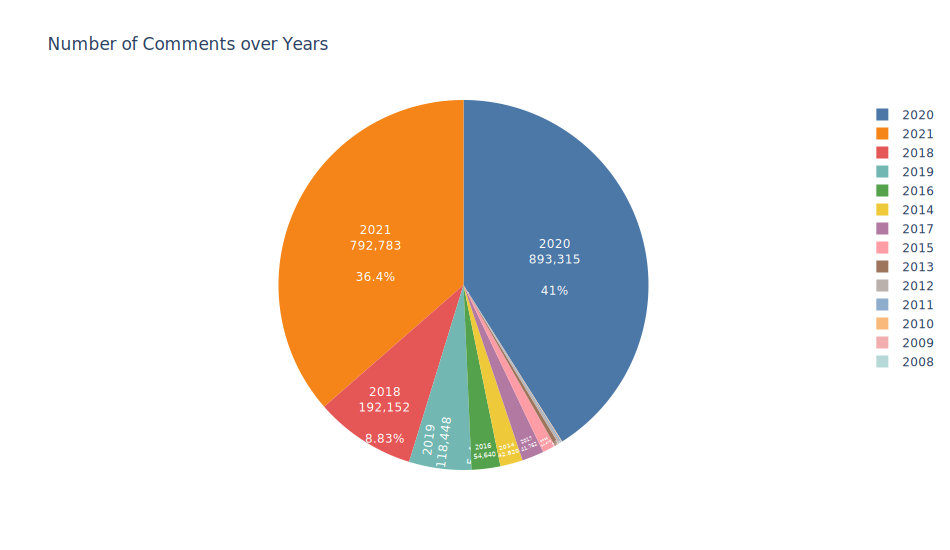

In [18]:
helpers.pie(df_years, "Number of Comments over Years")

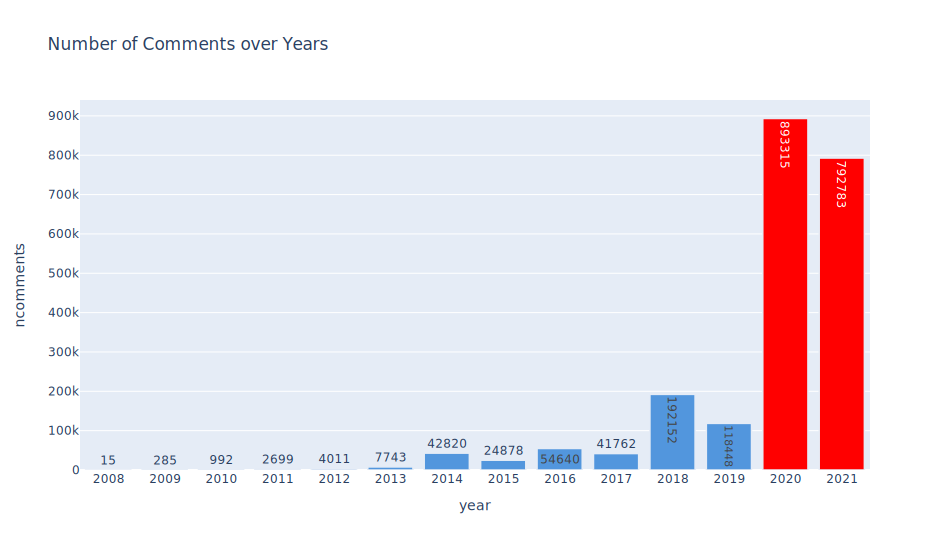


Note: Not All replies are included (only a sample of the replies)

Total Replies: 935770.0


In [19]:
helpers.bar(df_years, "year", "ncomments", "Number of Comments over Years", text=0, margin=250000)

print('\nNote: Not All replies are included (only a sample of the replies)\n')
print(f'Total Replies: {df_comments.nreplies.sum()}')

<a id='all_months'></a>
>>### Comments Created in Each Month
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months"><b>Comments Created in Each Month</b></a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>
 </ul>

In [20]:
df_month = df_creations.groupby(['month', 'year'])['ncomments'].sum().reset_index()

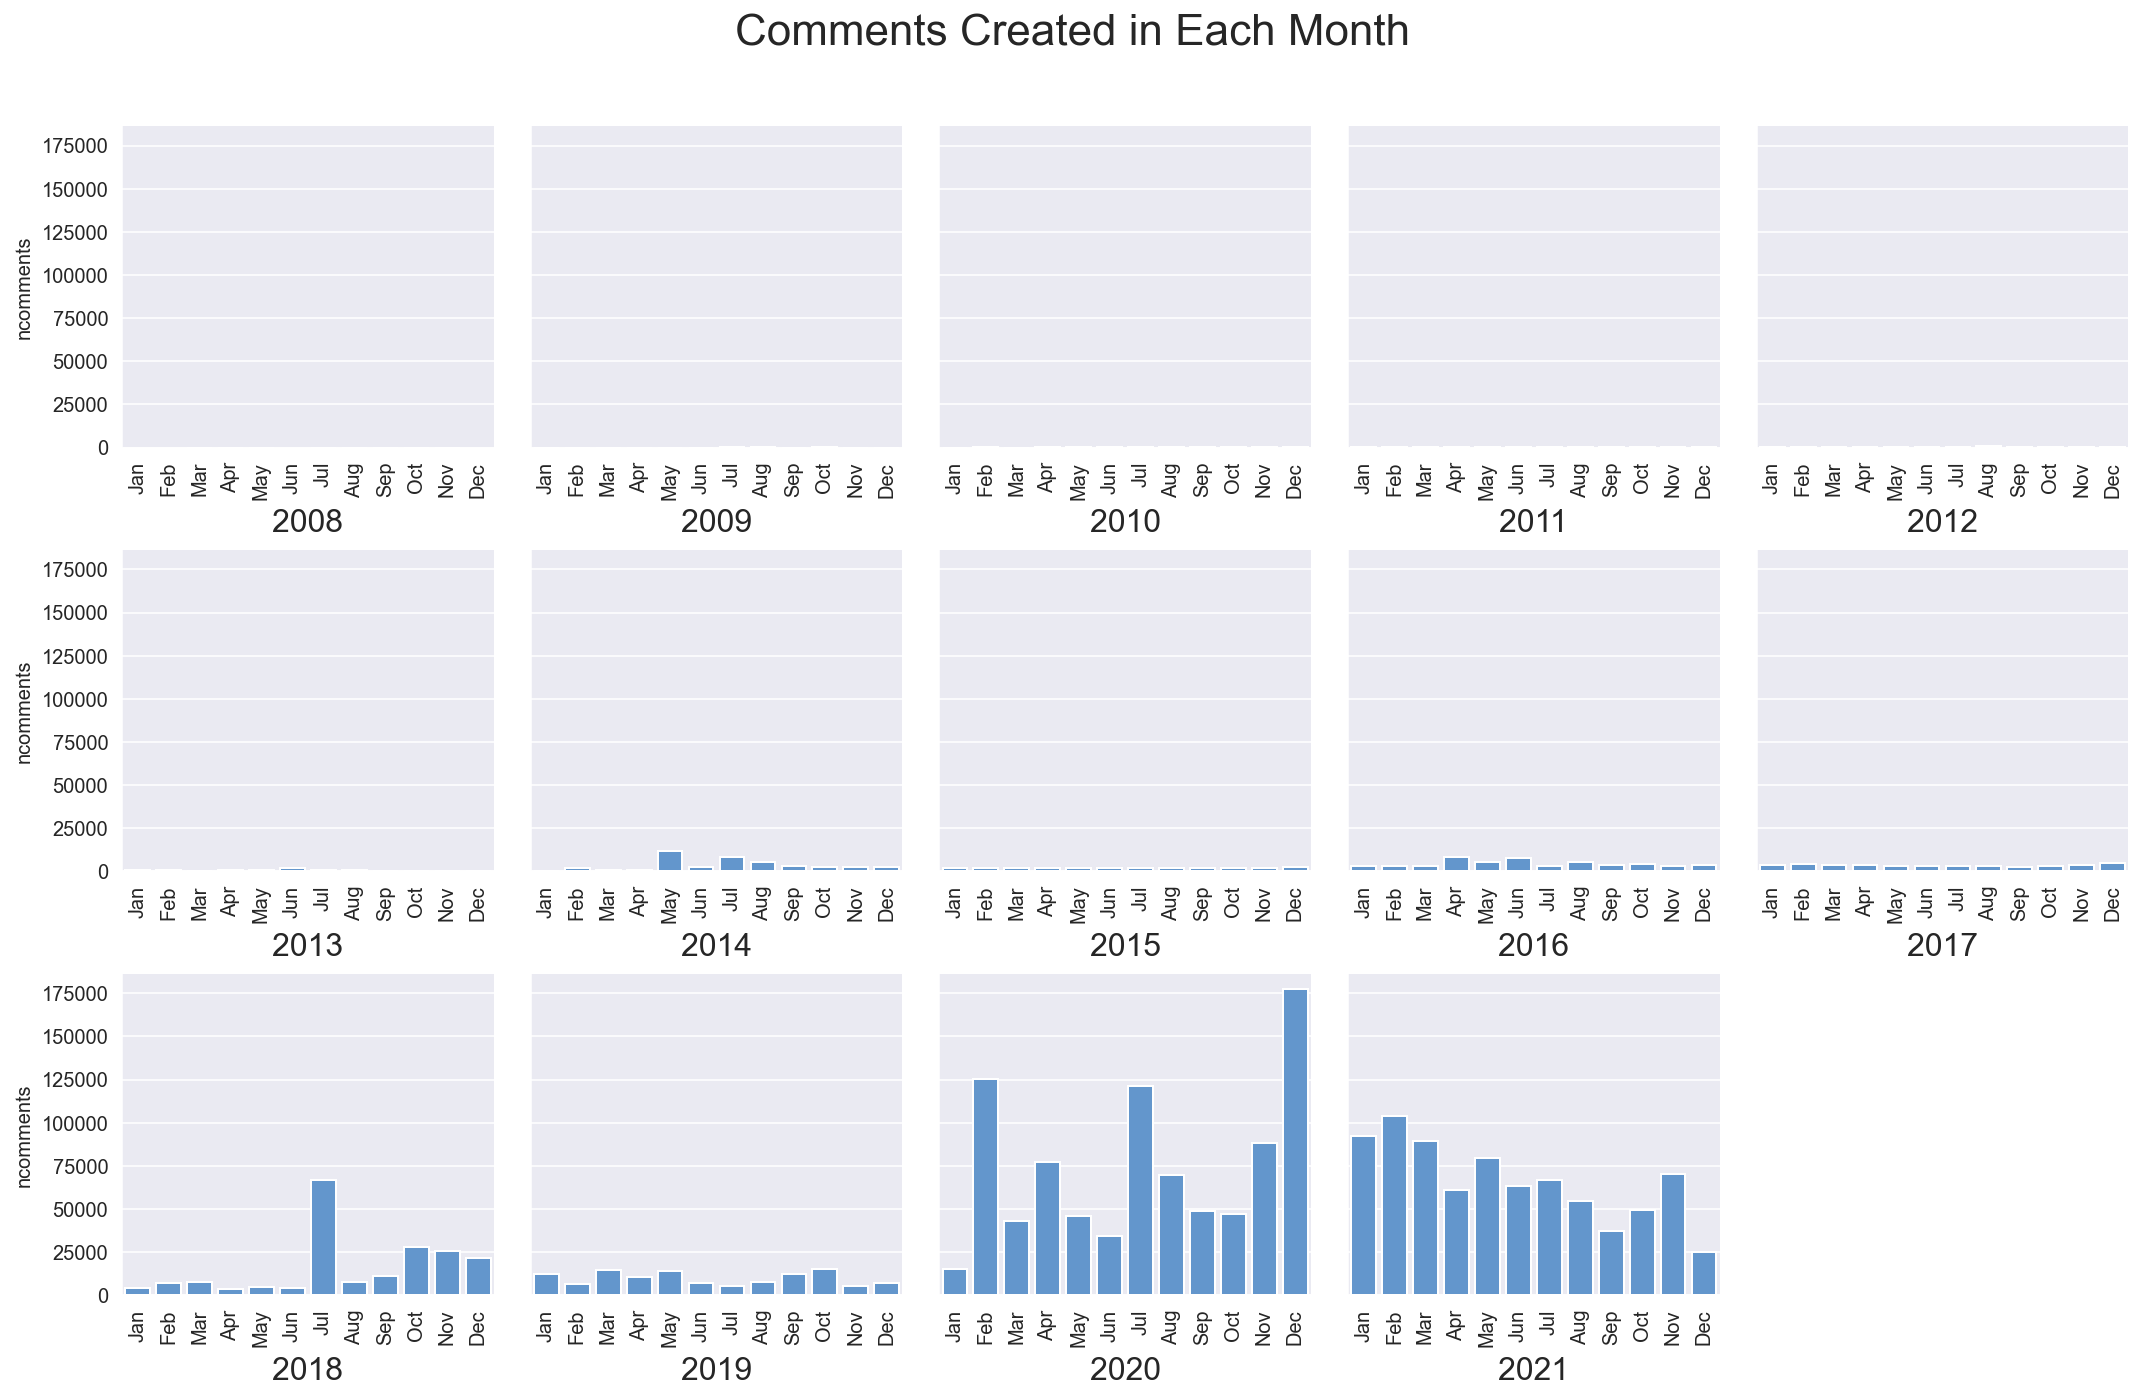

In [21]:
importlib.reload(helpers)
helpers.facet_day_month(df_month, "month", "ncomments", facet_on='year', n_col=5)

**NOTE:**
- 2018 Peaks --> Jul
- 2020 Peaks --> Feb, Jul, Dec
- 2021 Peaks --> Jan, Feb, Mar, Nov

<a id='all_days'></a>
>>### Comments Created in Each Day
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days"><b>Comments Created in Each Day</b></a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>
 </ul>

In [22]:
df_daily = df_creations.groupby(['date', 'year', 'month', 'dayofmonth'])['ncomments'].sum().reset_index()
df_daily.head(1)

,date,year,month,dayofmonth,ncomments
0,2008-03-26,2008,Mar,26,1


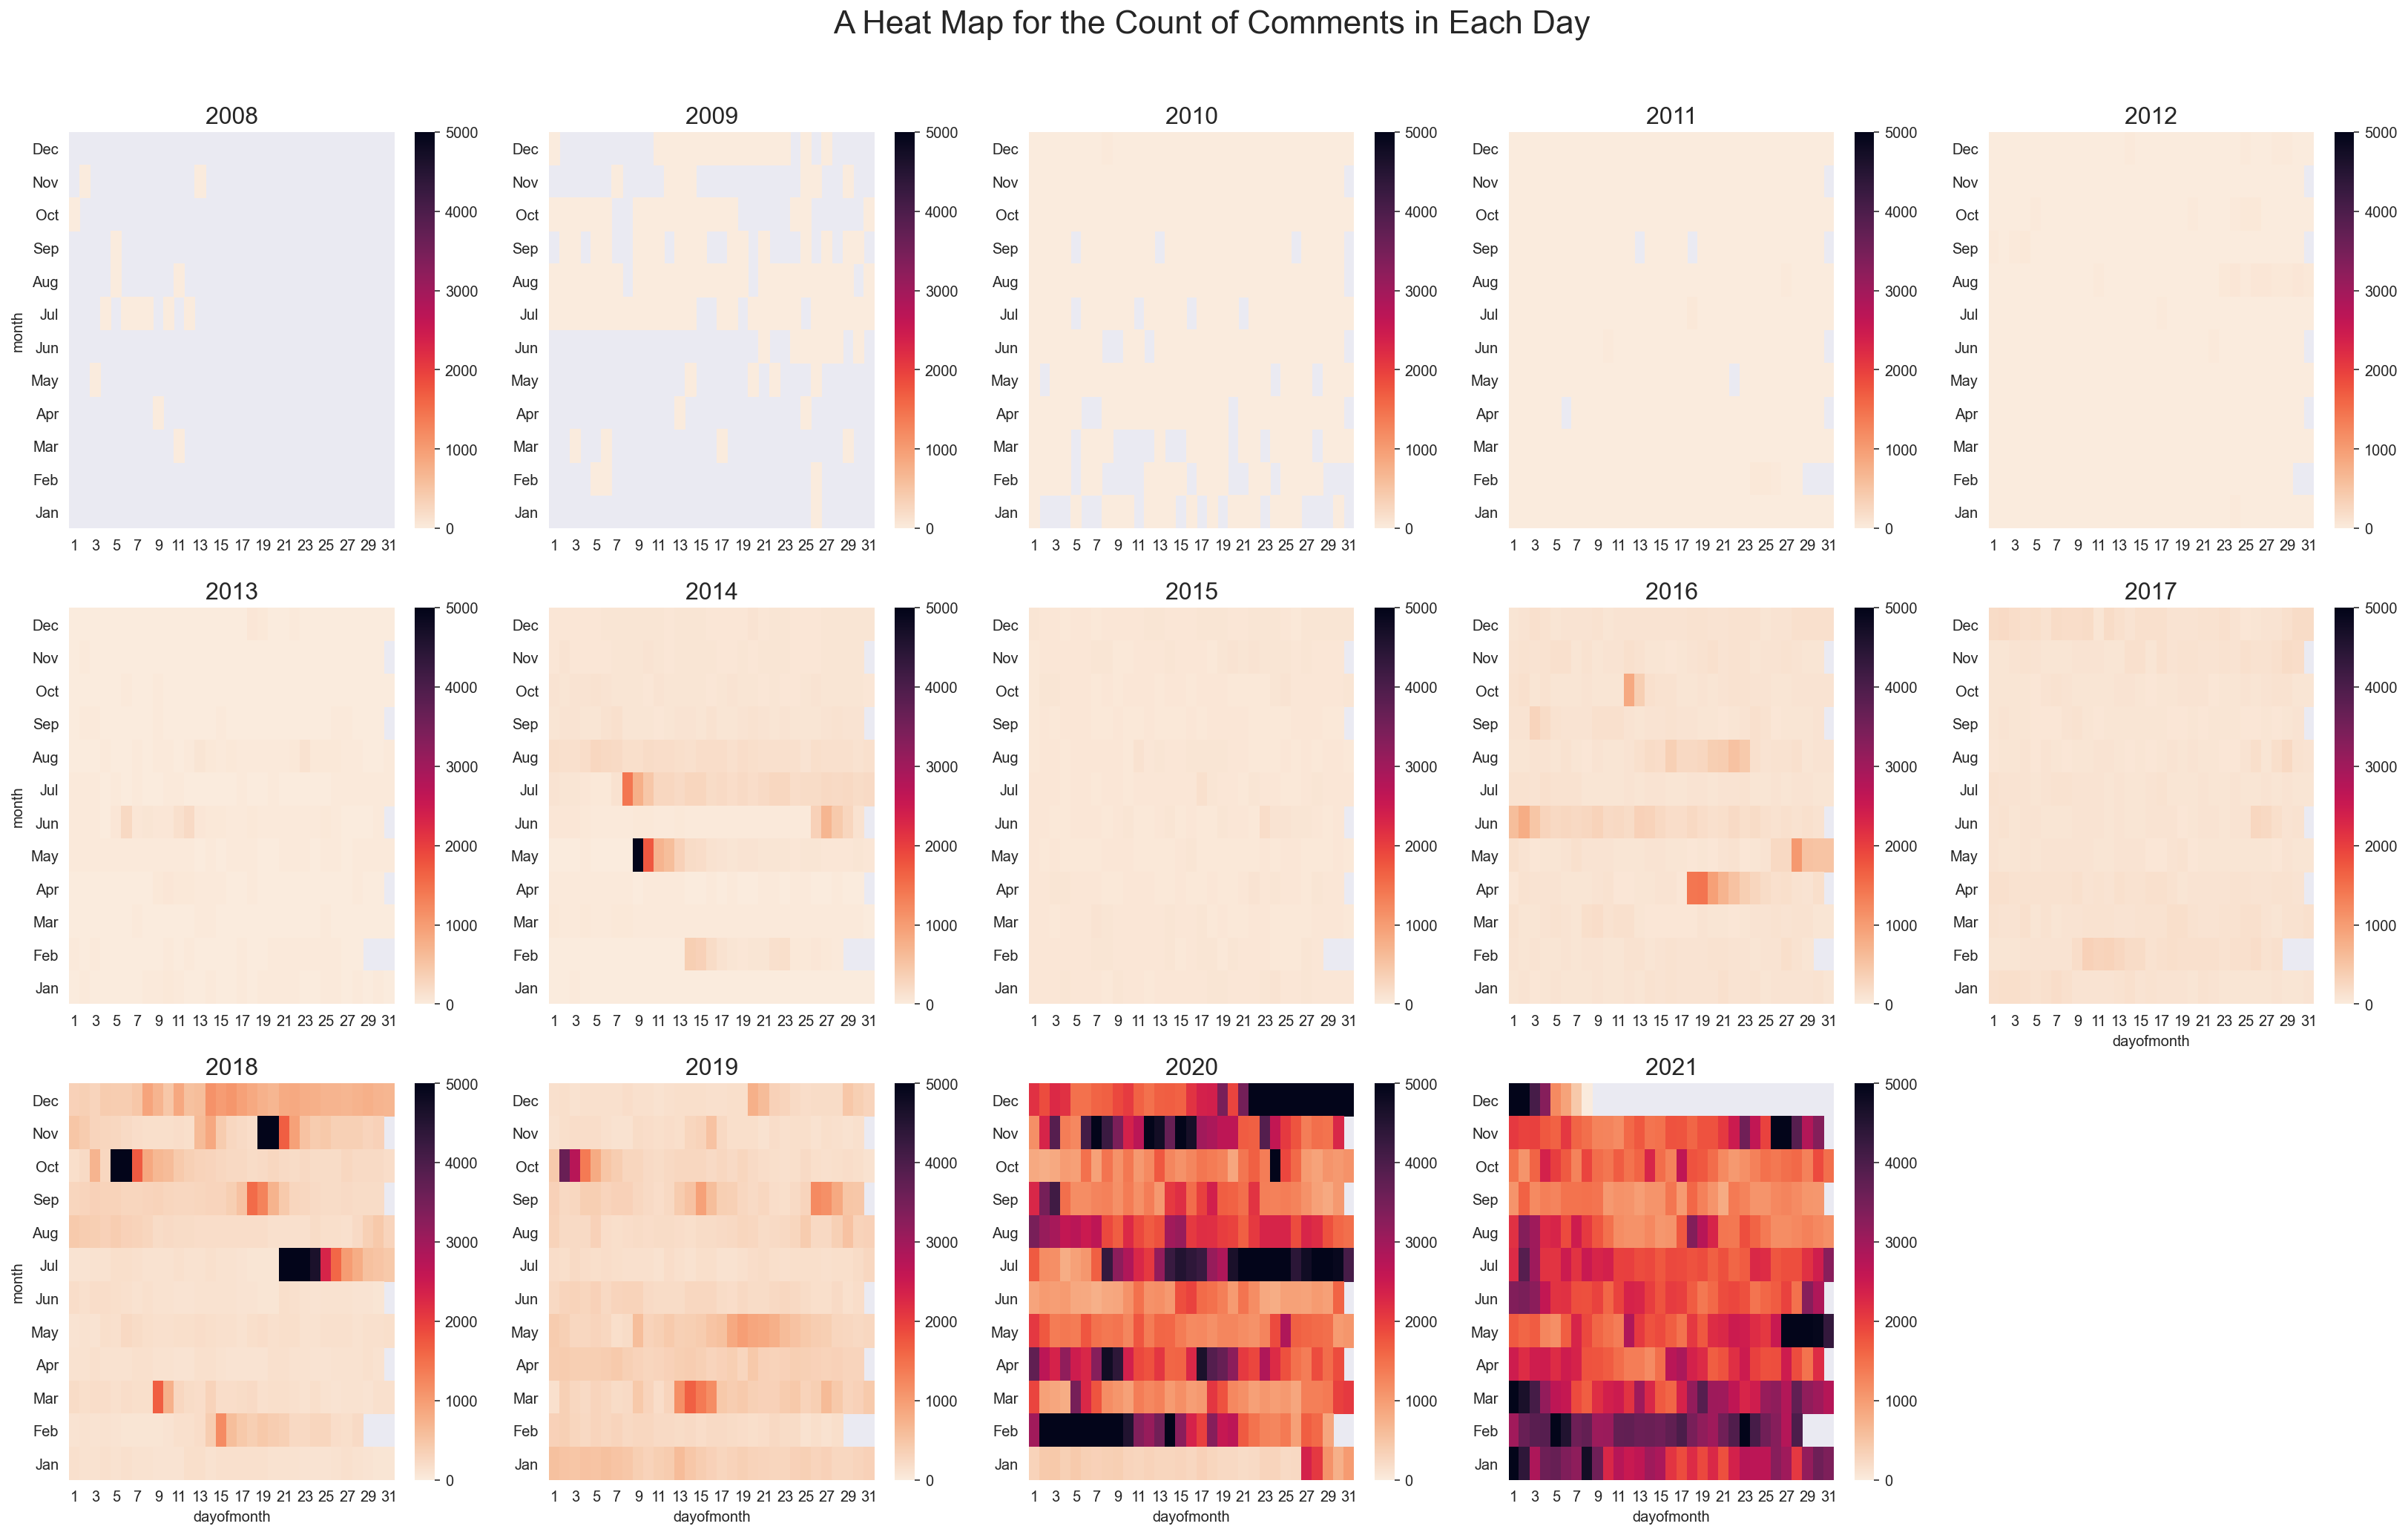

In [23]:
importlib.reload(helpers)
title = 'A Heat Map for the Count of Comments in Each Day'
helpers.facet_heat(df_daily, title, n_col=5, vmax=5000)

In [24]:
df_daily_18 = df_daily[df_daily["year"] == 2018]
df_daily_19 = df_daily[df_daily["year"] == 2019]
df_daily_20 = df_daily[df_daily["year"] == 2020]
df_daily_21 = df_daily[df_daily["year"] == 2021]

<a id='2018_days'></a>
>>### Comments Created in Each Day of 2018
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days"><b>Comments Created in Each Day of 2018</b></a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>
 </ul>

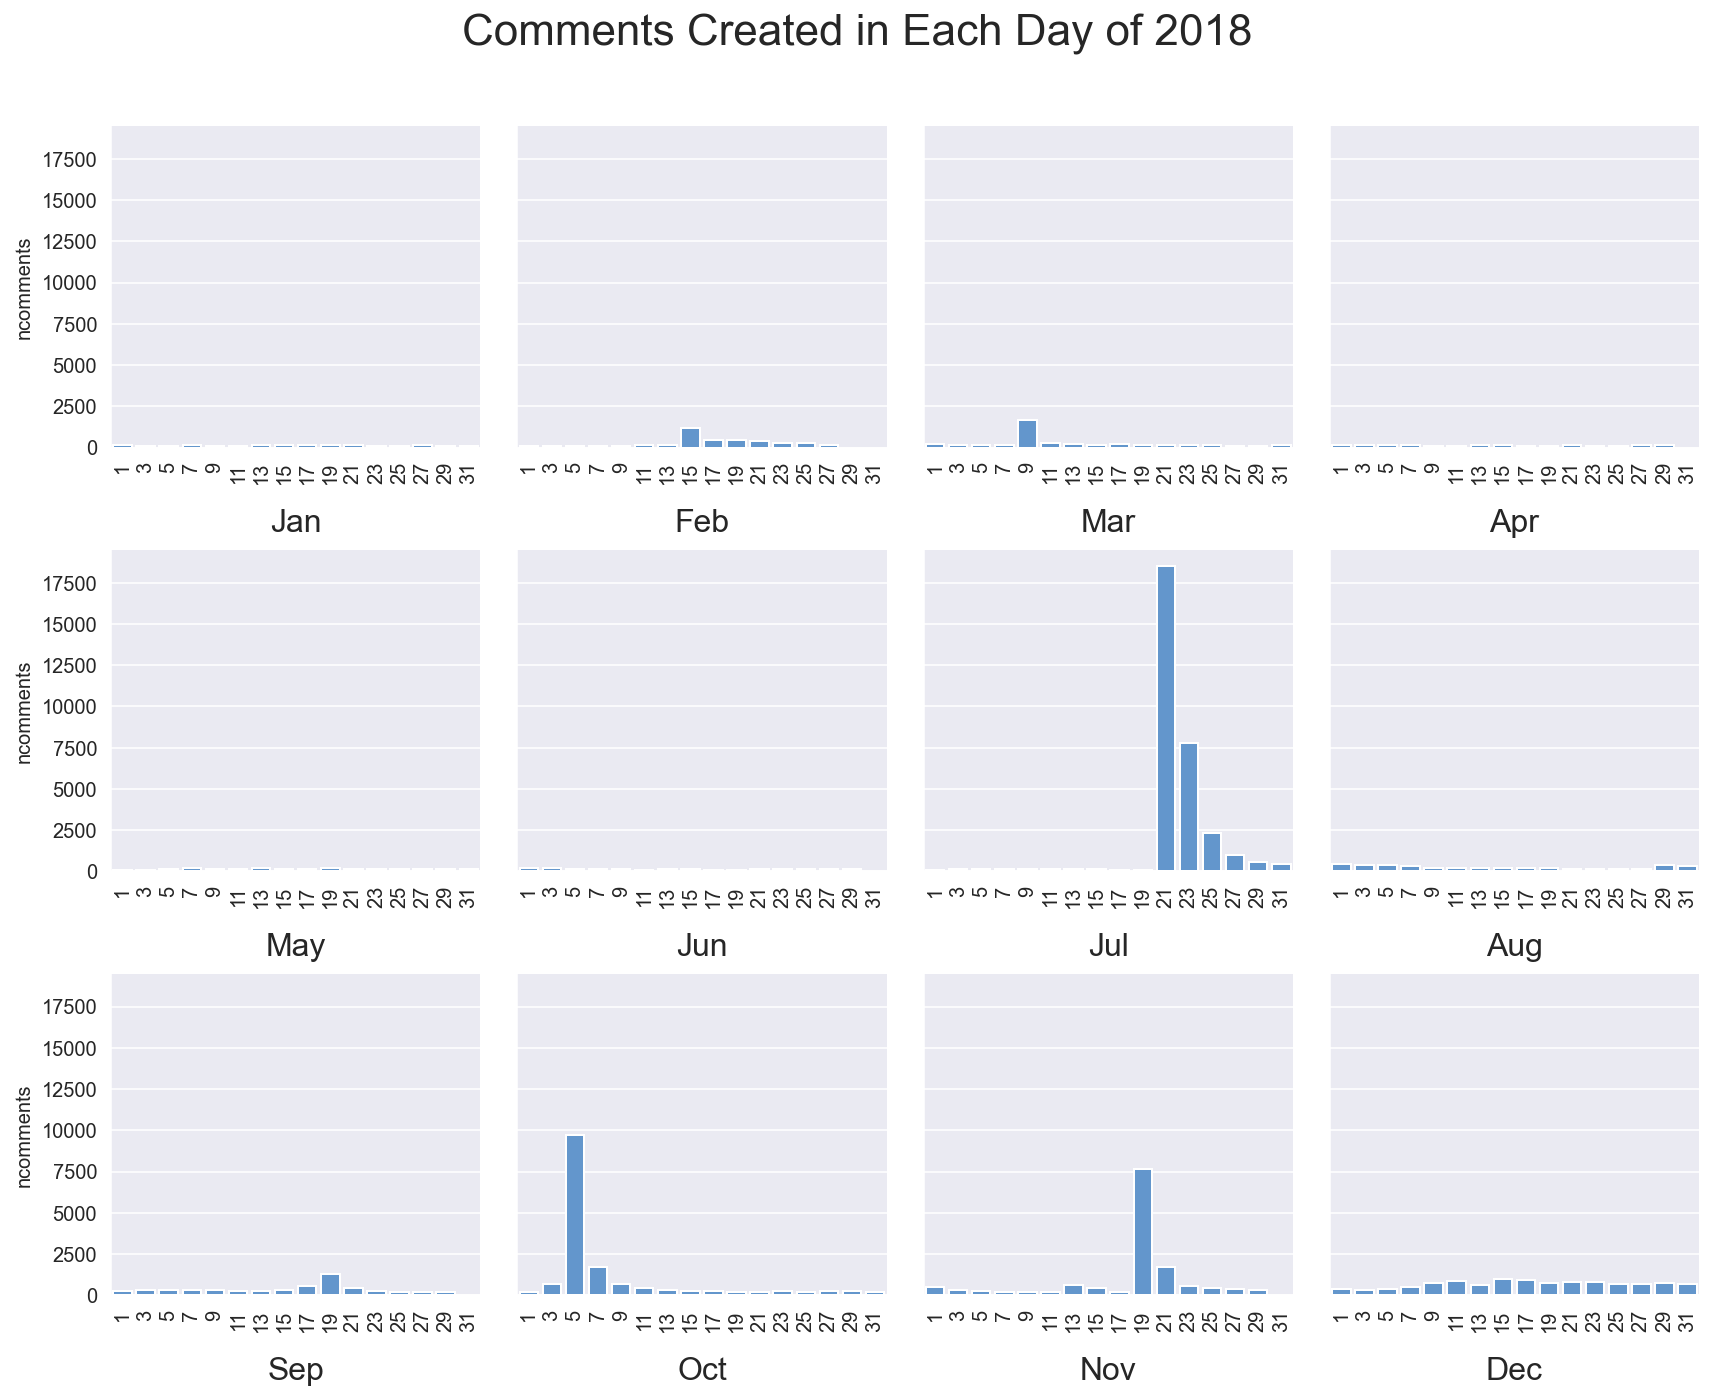

In [25]:
helpers.facet_day_month(df_daily_18, "dayofmonth", "ncomments", facet_on='month', n_col=4, year_str='2018')

<a id='2019_days'></a>
>>### Comments Created in Each Day of 2019
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days"><b>Comments Created in Each Day of 2019</b></a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>
 </ul>

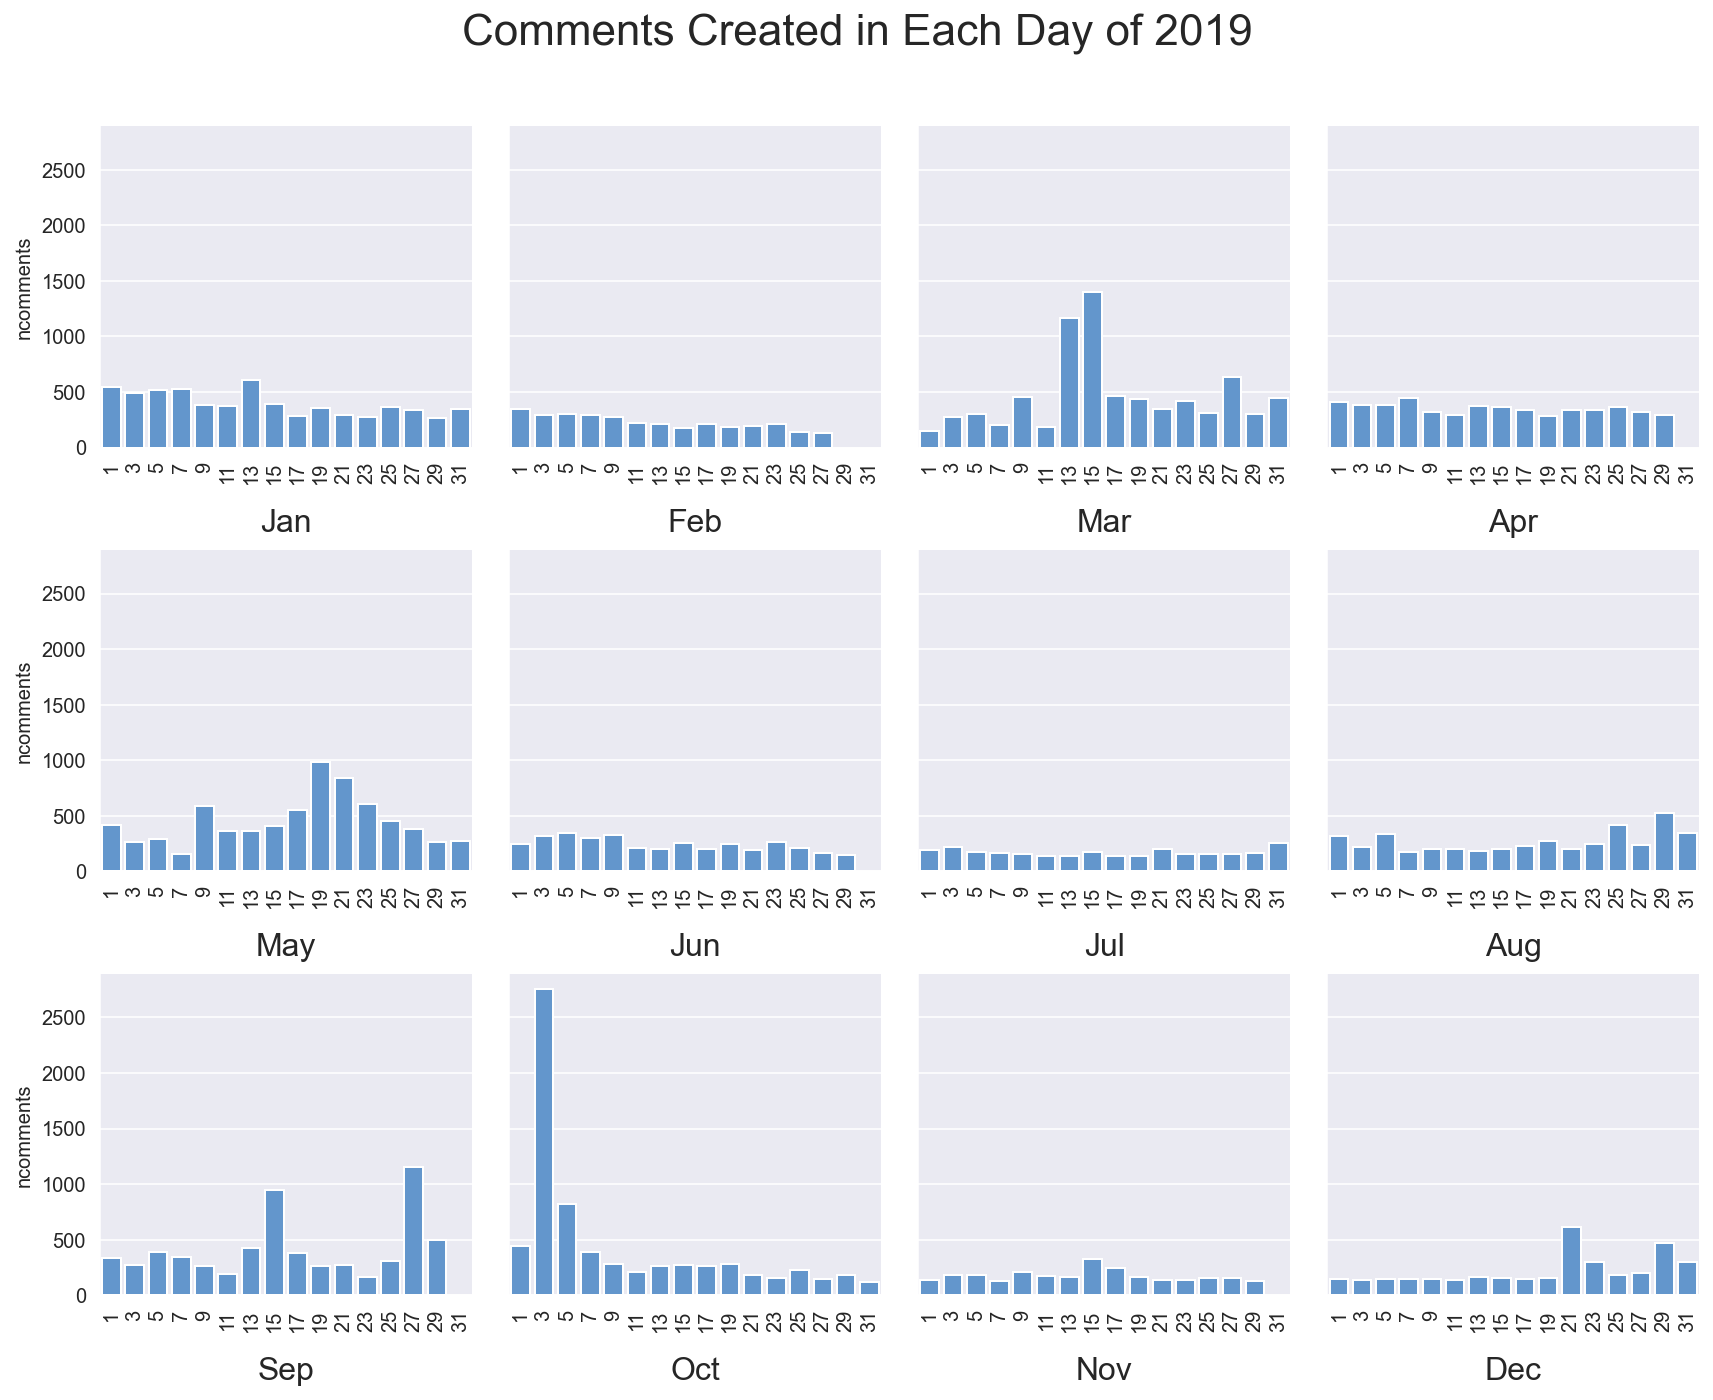

In [26]:
helpers.facet_day_month(df_daily_19, "dayofmonth", "ncomments", facet_on='month', n_col=4, year_str='2019')

<a id='2020_days'></a>
>>### Comments Created in Each Day of 2020
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days"><b>Comments Created in Each Day of 2020</b></a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>
 </ul>

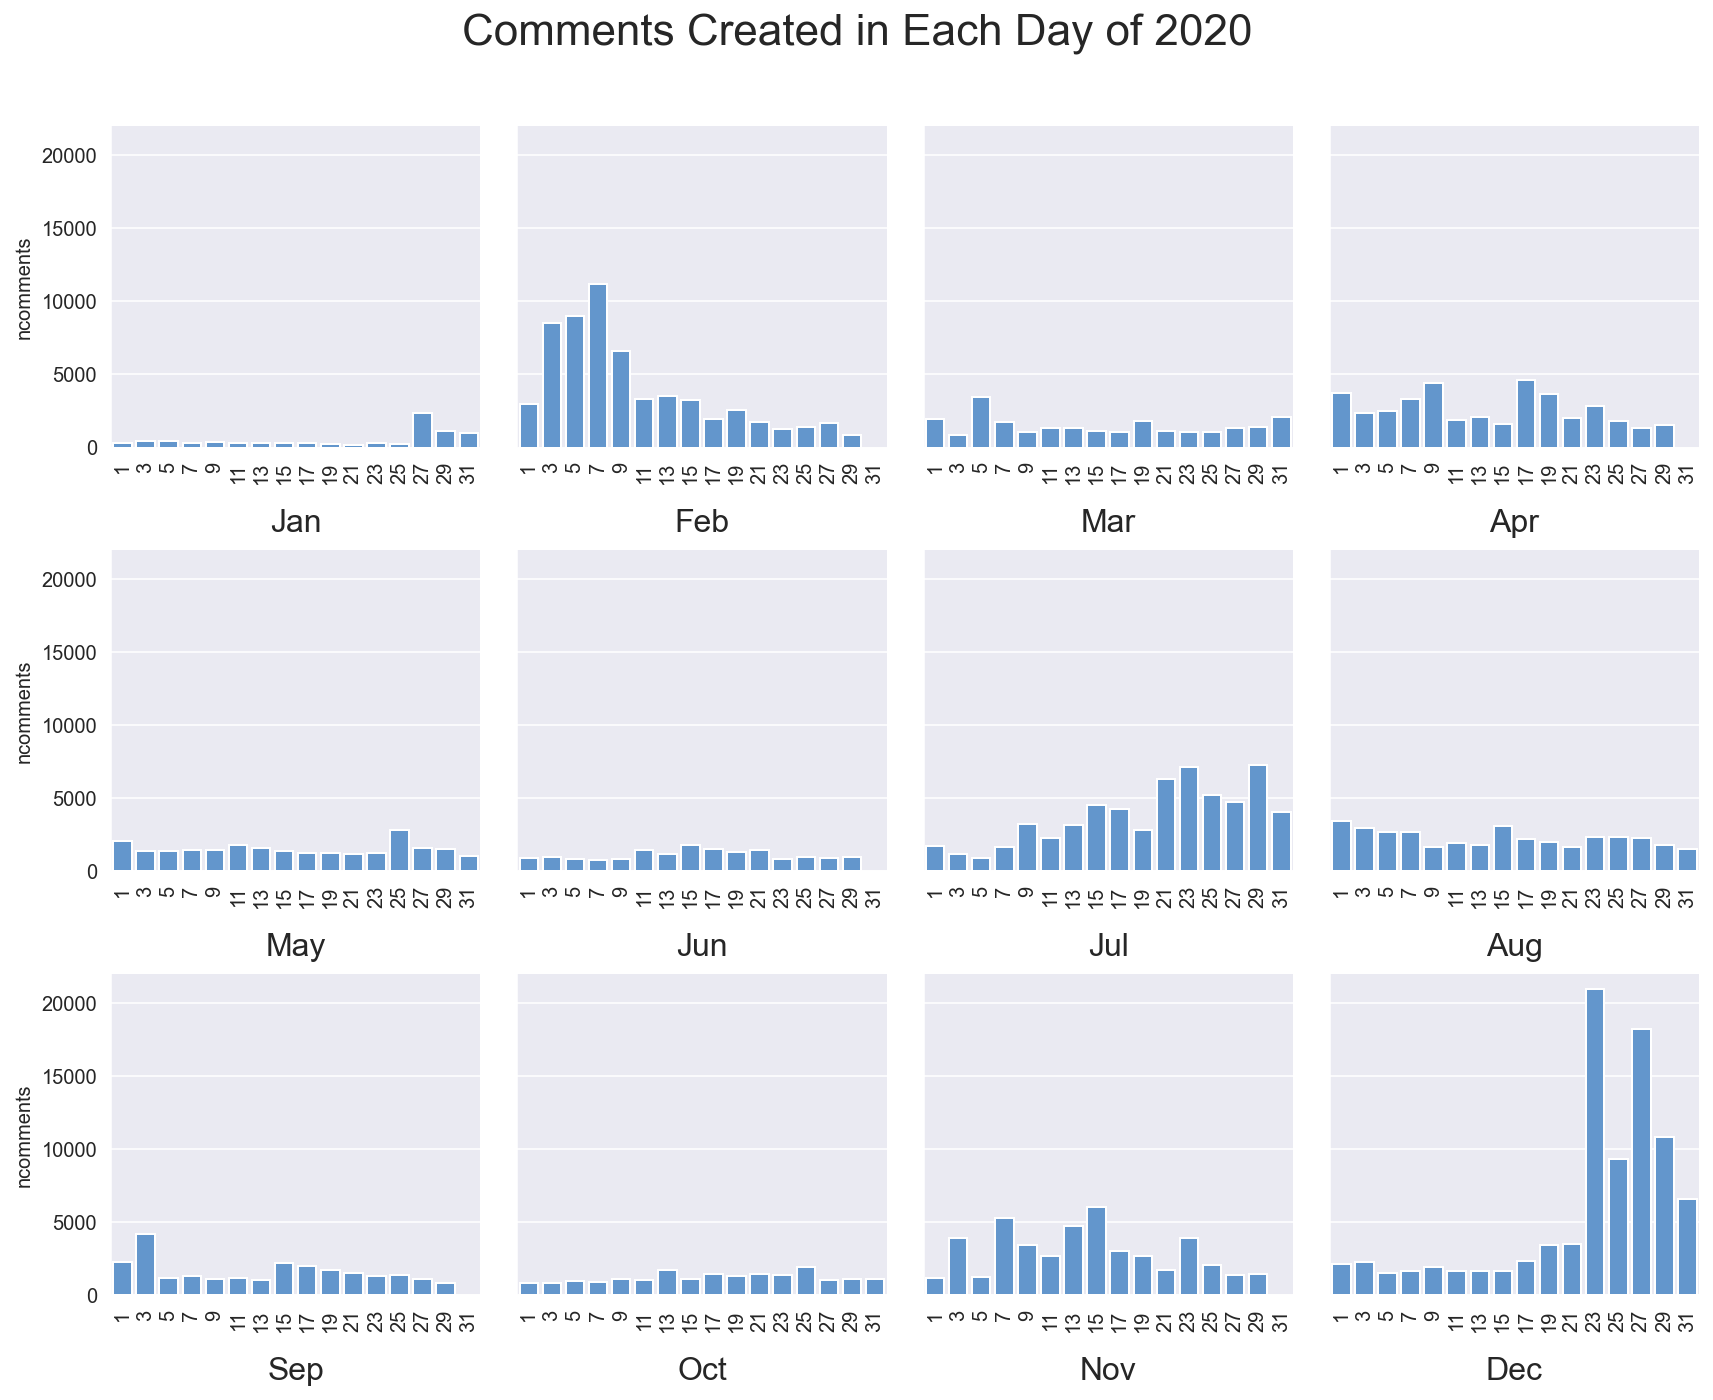

In [27]:
helpers.facet_day_month(df_daily_20, "dayofmonth", "ncomments", facet_on='month', n_col=4, year_str='2020')

<a id='2021_days'></a>
>>### Comments Created in Each Day of 2021
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days"><b>Comments Created in Each Day of 2021</b></a></li>
 </ul>


Note: December data is not complete



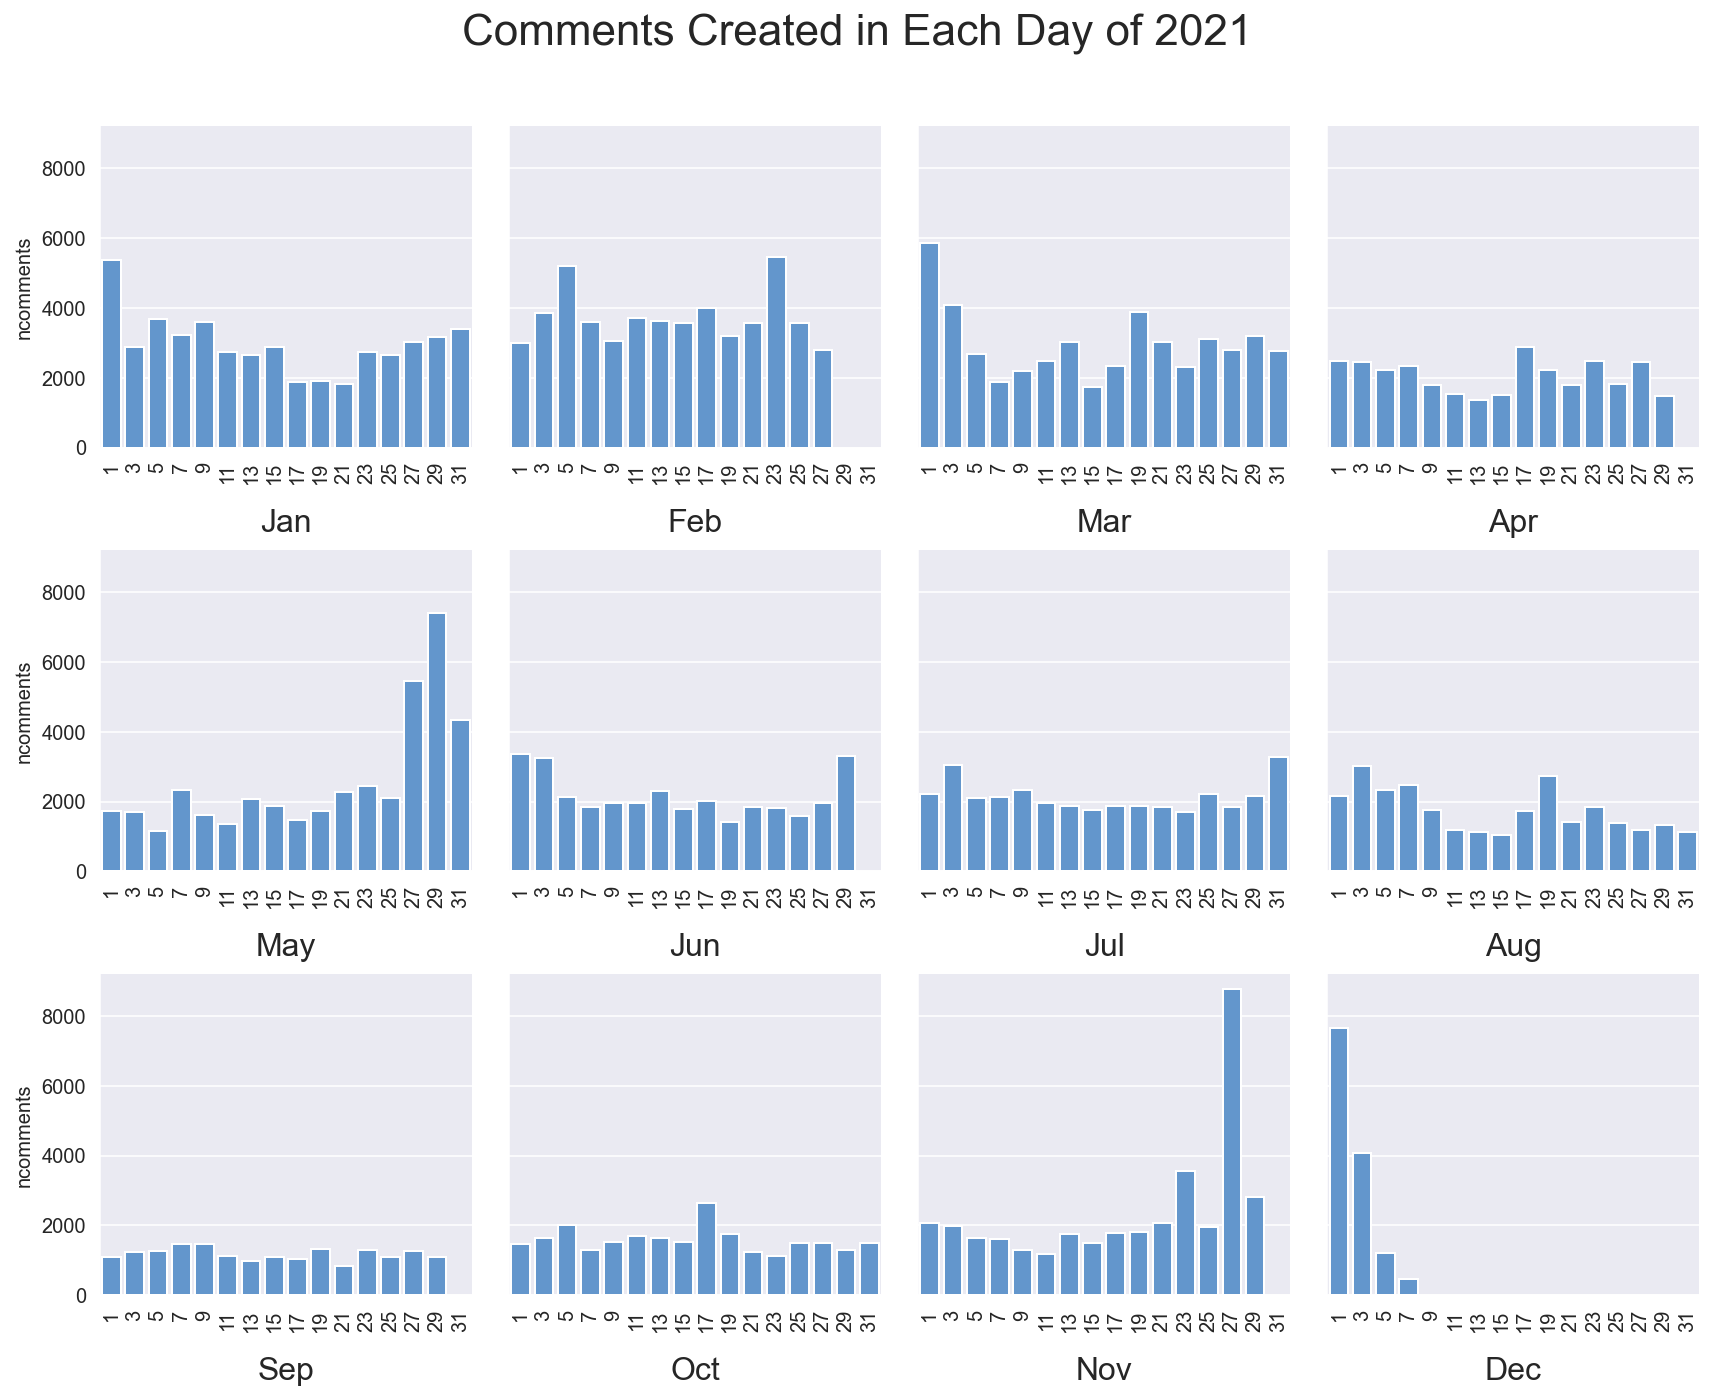

In [28]:
helpers.facet_day_month(df_daily_21, "dayofmonth", "ncomments", facet_on='month', n_col=4, year_str='2021')
print('\nNote: December data is not complete\n') 

<a id='peaks'></a>
>## Investigate Peaks
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks"><b>Peak Dates</b></a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

**NOTE:**
- 2018 Peaks --> Jul
- 2020 Peaks --> Feb, Jul, Dec
- 2021 Peaks --> Jan, Feb, Mar, Nov

In [29]:
df_peaks = df_daily.sort_values('ncomments', ascending=False)
df_peaks.head()

,date,year,month,dayofmonth,ncomments
3220,2018-07-22,2018,Jul,22,26021
4105,2020-12-23,2020,Dec,23,20907
3219,2018-07-21,2018,Jul,21,18536
4109,2020-12-27,2020,Dec,27,18206
4106,2020-12-24,2020,Dec,24,16771


In [30]:
# filter on dates with peaks
df_peaks = df_peaks[['date', 'ncomments']]
df_peaks_18 = df_peaks[df_peaks.date.dt.year == 2018]
df_peaks_19 = df_peaks[df_peaks.date.dt.year == 2019]
df_peaks_20 = df_peaks[df_peaks.date.dt.year == 2020]
df_peaks_21 = df_peaks[df_peaks.date.dt.year == 2021]

In [31]:
df_jul_18 = df_peaks[(df_peaks.date.dt.year == 2018) & (df_peaks.date.dt.month == 7)]
df_oct_19 = df_peaks[(df_peaks.date.dt.year == 2019) & (df_peaks.date.dt.month == 10)]
df_feb_20 = df_peaks[(df_peaks.date.dt.year == 2020) & (df_peaks.date.dt.month == 2)]
df_jul_20 = df_peaks[(df_peaks.date.dt.year == 2020) & (df_peaks.date.dt.month == 7)]
df_dec_20 = df_peaks[(df_peaks.date.dt.year == 2020) & (df_peaks.date.dt.month == 12)]
df_jan_21 = df_peaks[(df_peaks.date.dt.year == 2021) & (df_peaks.date.dt.month == 1)]
df_feb_21 = df_peaks[(df_peaks.date.dt.year == 2021) & (df_peaks.date.dt.month == 2)]
df_mar_21 = df_peaks[(df_peaks.date.dt.year == 2021) & (df_peaks.date.dt.month == 3)]
df_nov_21 = df_peaks[(df_peaks.date.dt.year == 2021) & (df_peaks.date.dt.month == 11)]

<a id='all'></a>
>>### Peaks in All Years
> <ul>
 <li><a href="#all"><b>All Years</b></a></li>
 <li><a href="#2018">2018</a></li>
 <li><a href="#2019">2019</a></li>
 <li><a href="#2020">2020</a></li>
 <li><a href="#2021">2021</a></li>
 </ul>

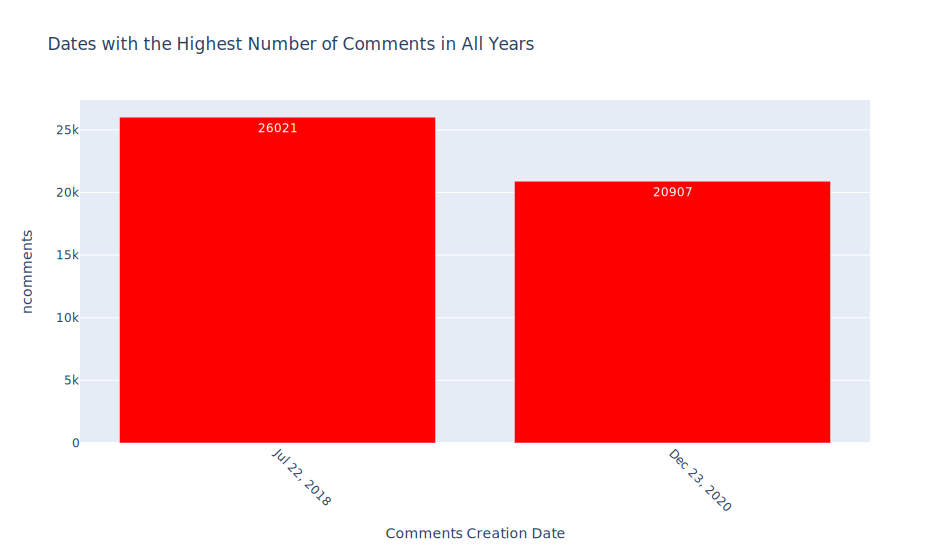

In [32]:
helpers.bar_peaks(df_peaks.head(2), "Dates with the Highest Number of Comments in All Years", threshold=0)

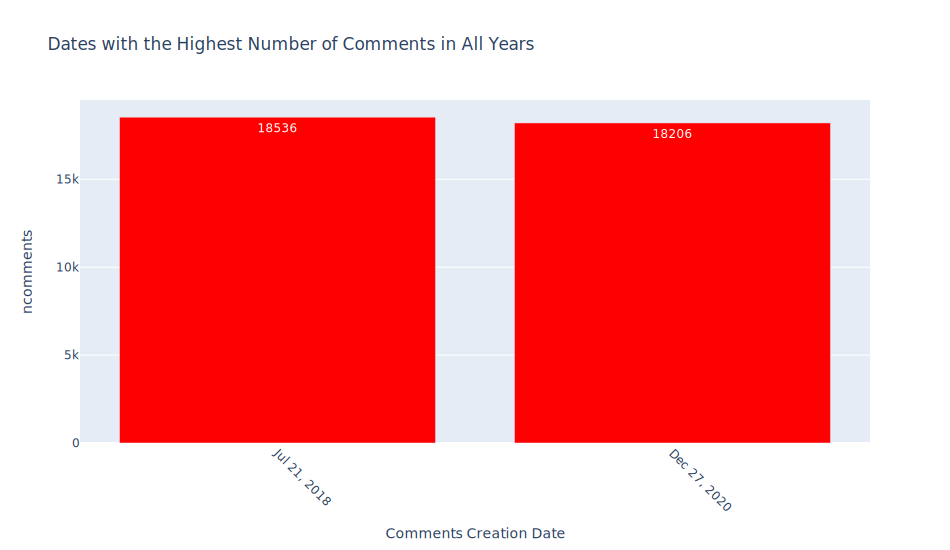

In [33]:
helpers.bar_peaks(df_peaks[2:].head(2), "Dates with the Highest Number of Comments in All Years")

<a id='2018'></a>
>>### 2018 Peaks
> <ul>
 <li><a href="#all">All Years</a></li>
 <li><a href="#2018"><b>2018</b></a></li>
 <li><a href="#2019">2019</a></li>
 <li><a href="#2020">2020</a></li>
 <li><a href="#2021">2021</a></li>
 </ul>

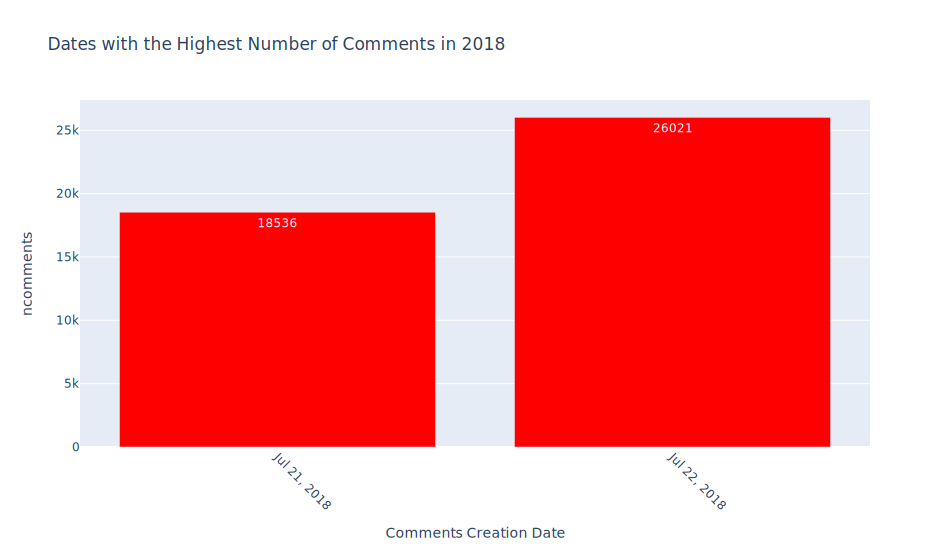

In [34]:
helpers.bar_peaks(df_peaks_18.head(2), "Dates with the Highest Number of Comments in 2018")

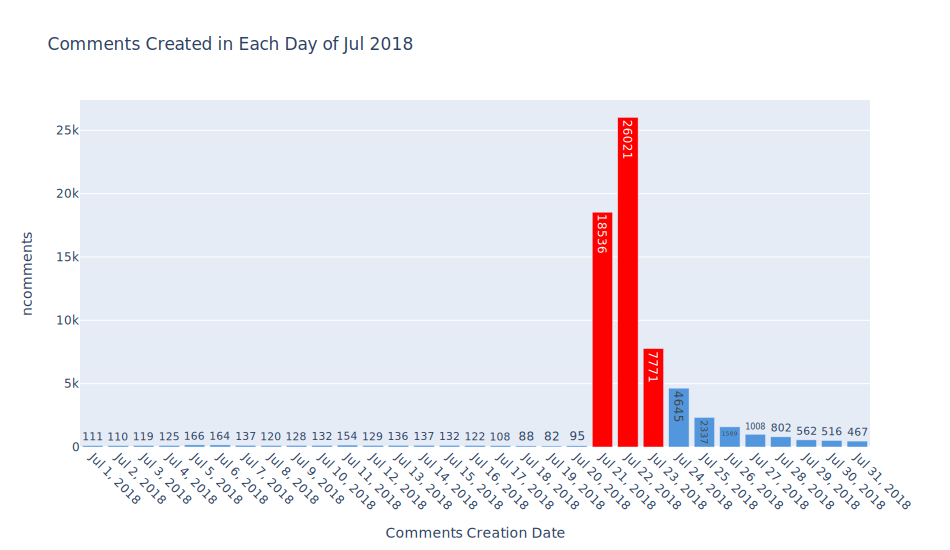

In [35]:
helpers.bar_peaks(df_jul_18, "Comments Created in Each Day of Jul 2018", 5000)

<a id='2019'></a>
>>### 2019 Peaks
> <ul>
 <li><a href="#all">All Years</a></li>
 <li><a href="#2018">2018</a></li>
 <li><a href="#2019"><b>2019</b></a></li>
 <li><a href="#2020">2020</a></li>
 <li><a href="#2021">2021</a></li>
 </ul>

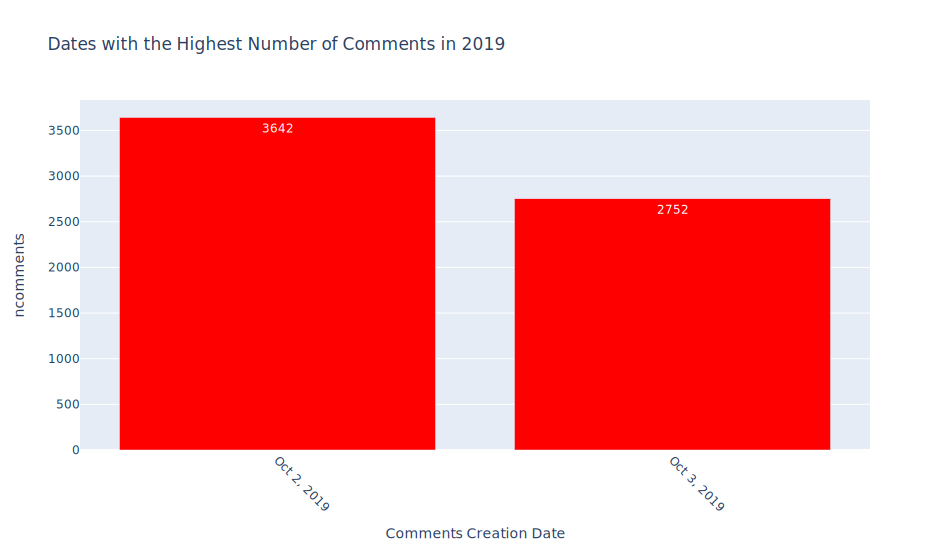

In [36]:
helpers.bar_peaks(df_peaks_19.head(2), "Dates with the Highest Number of Comments in 2019")

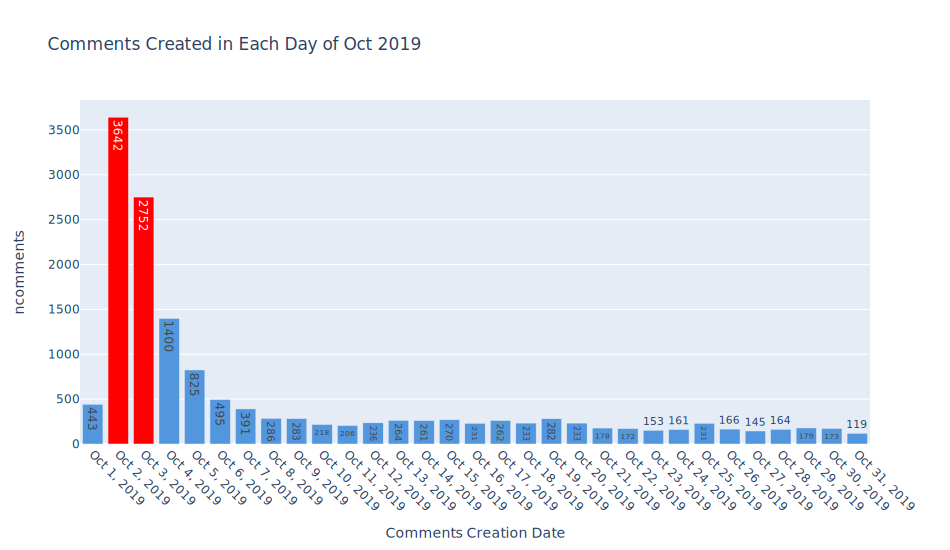

In [37]:
helpers.bar_peaks(df_oct_19, "Comments Created in Each Day of Oct 2019", 2500)

**NOTE:**
- 2019 Peaks --> 
  - Oct 2, 2019
  - Oct 3, 2019
  - Oct 4, 2019

<a id='2020'></a>
>>### 2020 Peaks
> <ul>
 <li><a href="#all">All Years</a></li>
 <li><a href="#2018">2018</a></li>
 <li><a href="#2019">2019</a></li>
 <li><a href="#2020"><b>2020</b></a></li>
 <li><a href="#2021">2021</a></li>
 </ul>

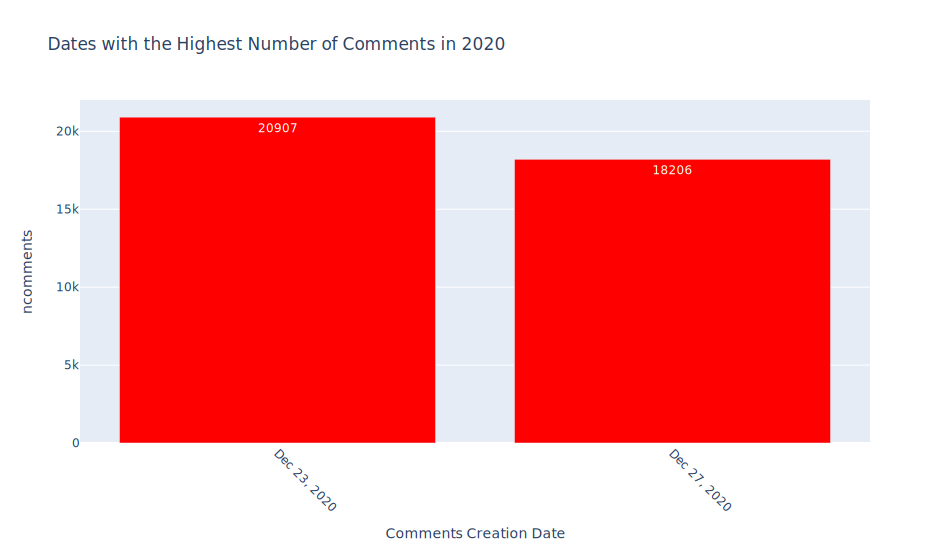

In [38]:
helpers.bar_peaks(df_peaks_20.head(2), "Dates with the Highest Number of Comments in 2020")

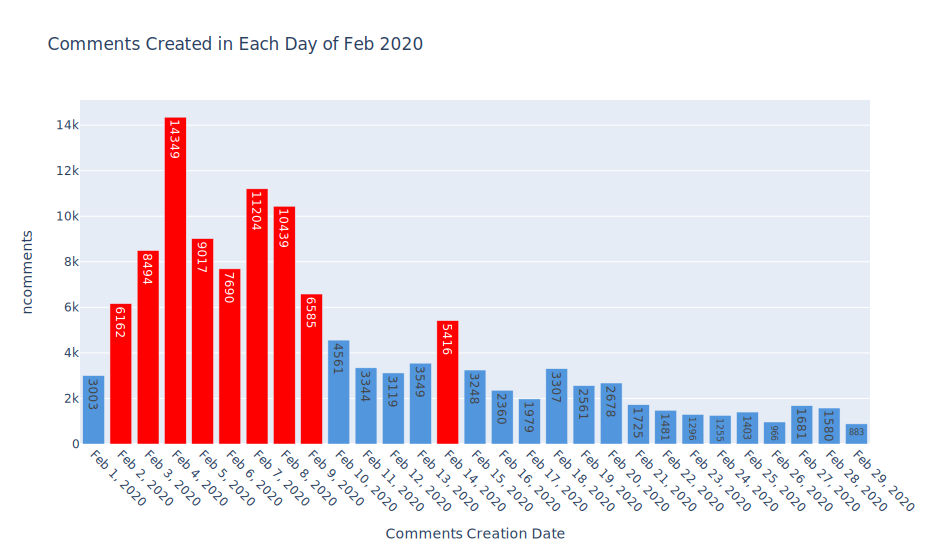

In [39]:
helpers.bar_peaks(df_feb_20, "Comments Created in Each Day of Feb 2020", 5000)

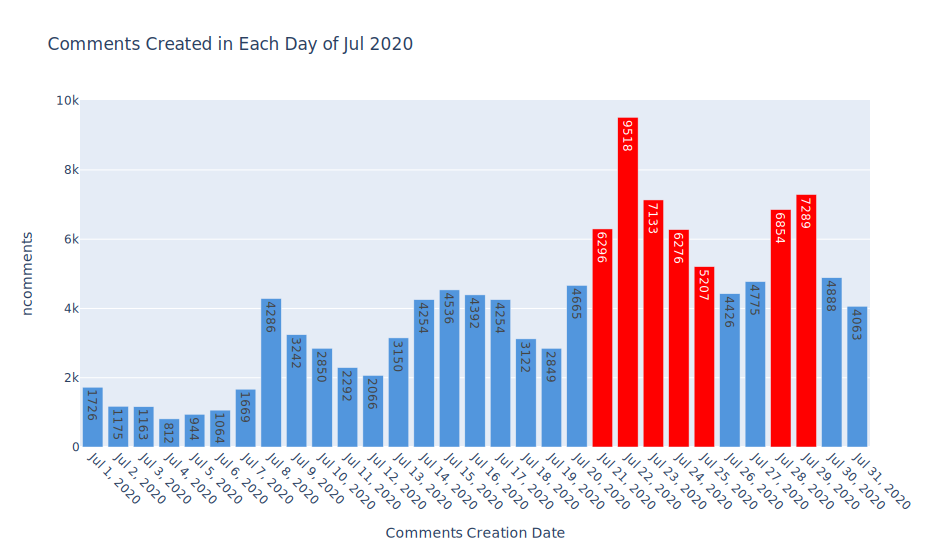

In [40]:
helpers.bar_peaks(df_jul_20, "Comments Created in Each Day of Jul 2020", 5000)

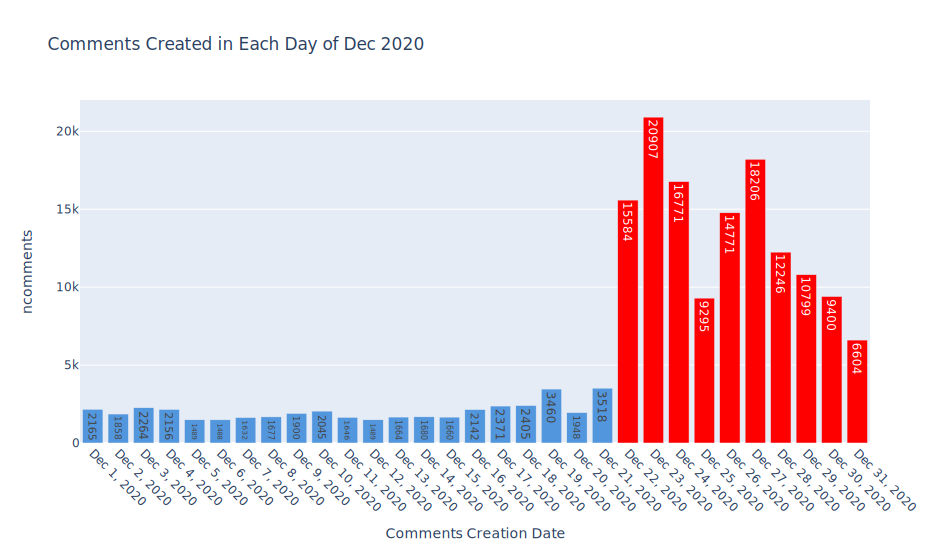

In [41]:
helpers.bar_peaks(df_dec_20, "Comments Created in Each Day of Dec 2020", 5000)

<a id='2021'></a>
>>### 2021 Peaks
> <ul>
 <li><a href="#all">All Years</a></li>
 <li><a href="#2018">2018</a></li>
 <li><a href="#2019">2019</a></li>
 <li><a href="#2020">2020</a></li>
 <li><a href="#2021"><b>2021</b></a></li>
 </ul>

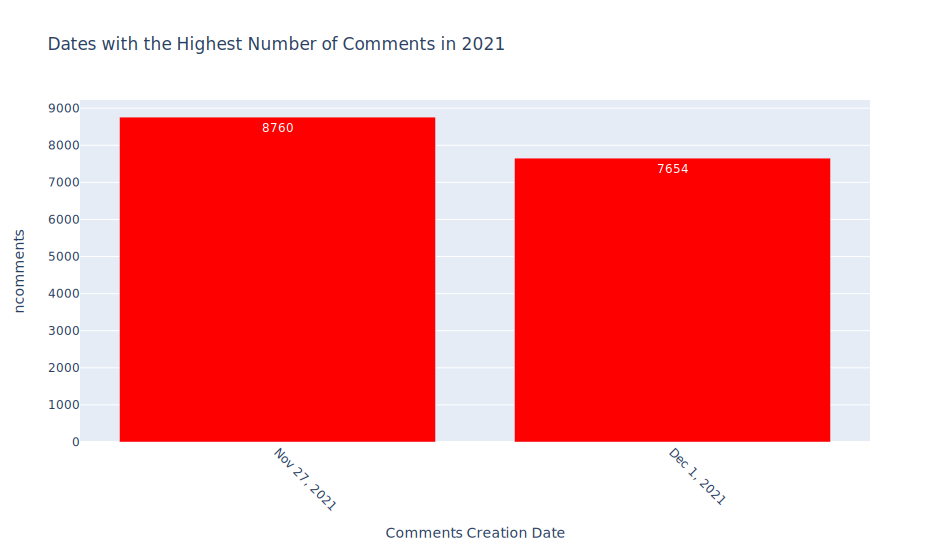

In [42]:
helpers.bar_peaks(df_peaks_21.head(2), "Dates with the Highest Number of Comments in 2021")

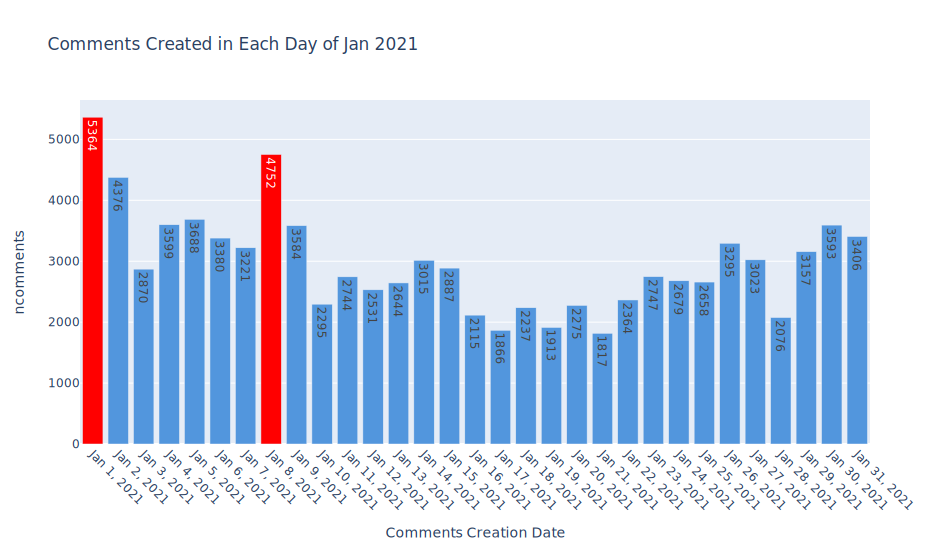

In [43]:
helpers.bar_peaks(df_jan_21, "Comments Created in Each Day of Jan 2021", 4500)

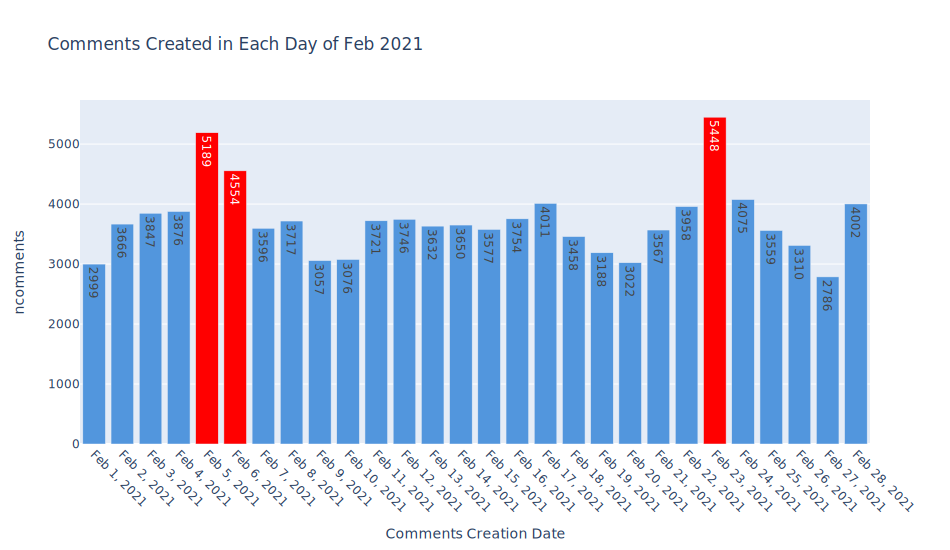

In [44]:
helpers.bar_peaks(df_feb_21, "Comments Created in Each Day of Feb 2021", 4500)

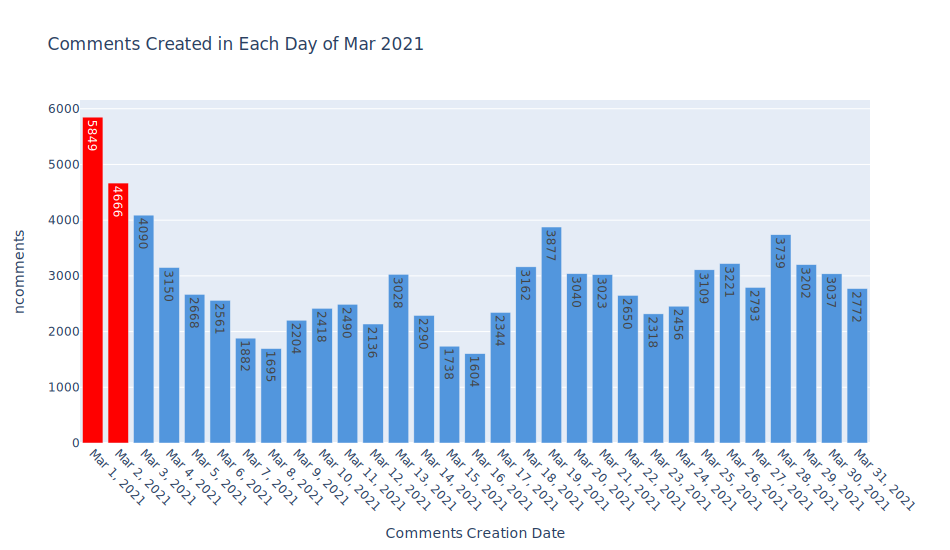

In [45]:
helpers.bar_peaks(df_mar_21, "Comments Created in Each Day of Mar 2021", 4500)

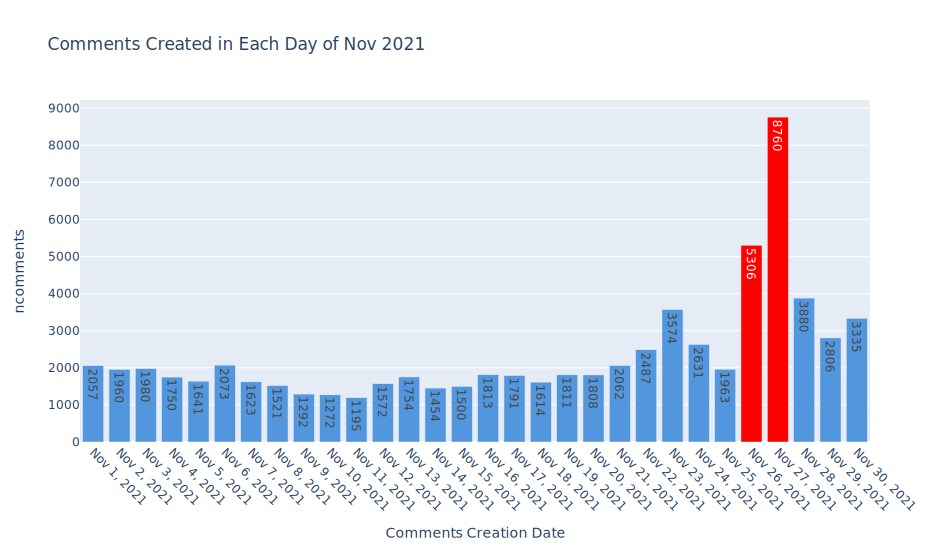

In [46]:
helpers.bar_peaks(df_nov_21, "Comments Created in Each Day of Nov 2021", 5000)

<br>

<br>

<a id='top_peaks'></a>
>## Comments on Peak Days
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#top_peaks"><b>Comments on Peak Days</b></a></li> 
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

<a id='peak_dates'></a>
>>### Comments on Peak Dates
> <ul>
 <li><a href="#peak_dates"><b>Comments on Peak Dates</b></a></li> 
 <li><a href="#users_peak_dates">Users with The Most Contributions on Each Date</a></li>
 </ul>

In [47]:
df_comments.head(1)

,video_id,comment_etag,comment_id,text,username,author_ch_id,nlikes,p_dtime,u_dtime,nreplies,moderation_status,comment_reply,parent_id,author_ch_url,author_profile_image,year,date,month,dayofmonth,hour
0,DiXRVYRZchs,mvtTos5huTqXhtAs-JPzt7mls_A,UgjyORuX3p35VXgCoAEC,good work!,Shocka Delica,UC6cJzw3ChENHVREKzpx1e3Q,9.0,2013-11-29 05:18:47+00:00,2013-11-29 05:18:47+00:00,1.0,NaN,comment,none,none,none,2013,2013-11-29,Nov,29,5


### Peak Dates

In [48]:
df_peaks.head(10)

,date,ncomments
3220,2018-07-22,26021
4105,2020-12-23,20907
3219,2018-07-21,18536
4109,2020-12-27,18206
4106,2020-12-24,16771
4104,2020-12-22,15584
4108,2020-12-26,14771
3782,2020-02-04,14349
4110,2020-12-28,12246
3785,2020-02-07,11204


### 2018-07-22 --> (26021 comments)

In [49]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2018-07-22"]["text"].value_counts().head()

awesome        66
wow            54
nice           27
black manta    25
meh            22
Name: text, dtype: int64

Fuck off     
5

Shut up bitch! If you liked the visual effects in recent movies like Avengers: Infinity War, Black Panther, or Ready Player One, then youâ€™ll be happy to know that the same company is also working on Aquaman ;)    
4

## <font color='red'><b>Note:</b> Most 2020 peaks are Negative Comments</font>

### 2020-12-23 --> (20907 comments)
<font color='red'>Negative Comments</font>

In [50]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2020-12-23"]["text"].value_counts().head(10)

they won't believe you because you are a man she is not a victim                4289
they won't believe you because you are a man amber heard she is not a victim     511
they won't believe you because you are a man                                     260
they won't believe you because you are a man amber heard                         213
they won't believe you because you are a man she is not the victim               158
justice for johnny                                                               141
she is not a victim                                                              137
#justiceforjohnny                                                                121
#justiceforjohnnydepp                                                             89
they won't believe you because your a man she is not a victim                     89
Name: text, dtype: int64

In [51]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2020-12-23"]["username"].value_counts().head(10)

Stevie J Raw                   49
ذگذ½ذ´ر€ذµذ¹ ذ’ذ¾ذµذ¹ذ؛ذ¾      36
Kabir Mishra                   33
eHacker                        30
ذ رƒرپذ»ذ°ذ½ ذ”ذ°ذ²ر‹ذ´ذ¾ذ²    28
netwix                         21
John Dickey                    17
Promptus Mortis                16
Topher                         16
Gle773                         15
Name: username, dtype: int64

### 2018-07-21 --> (18536 comments)

In [52]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2018-07-21"]["text"].value_counts().head()

wow         37
awesome     33
first       17
i dig it    16
epic        16
Name: text, dtype: int64

Badass                
8

### 2020-12-27 --> (18206 comments)
<font color='red'>Negative Comments</font>

In [53]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2020-12-27"]["text"].value_counts().head(10)

they won't believe you because you are a man she is not a victim      9186
they won't believe you because you are a man she is not the victim     256
they wont believe you because you are a man she is not a victim        210
they won't believe you because you are a man she is not a victim!      143
they won't believe you because you are a man                           112
good soldiers follow orders                                             99
she is not a victim                                                     98
they won't believe youbecause you are a man she is not a victim         95
they won't belive you because you are a man she is not a victim         85
they won't believe you because your a man she is not a victim           84
Name: text, dtype: int64

### 2020-12-24 --> (16771 comments)
<font color='red'>Negative Comments</font>

In [54]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2020-12-24"]["text"].value_counts().head(10)

they won't believe you because you are a man she is not a victim      4153
they won't believe you because you are a man she is not the victim     239
she is not a victim                                                    165
they won't believe you because you are a man                           136
#justiceforjohnnydepp                                                  123
they wont believe you because you are a man she is not a victim        102
they won't believe you because you are a man she is not a victim!       81
they won't believe you because your a man she is not a victim           72
#justiceforjohnny                                                       72
justice for johnny                                                      59
Name: text, dtype: int64

### 2020-12-22 --> (15584 comments)
<font color='red'>Negative Comments</font>

In [55]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2020-12-22"]["text"].value_counts().head(10)

they won't believe you because you are a man amber heard                        1738
they won't believe you because you are a man amber heard she is not a victim     594
they wont believe you because you are a man amber heard                          264
justice for johnny                                                               255
execute order 66                                                                 209
they won't believe you because your a man amber heard                            173
they won't believe you because you are a man                                     157
#justiceforjohnny                                                                144
excecute order 66                                                                102
justice for johnny depp                                                           51
Name: text, dtype: int64

### 2020-12-26 --> (14771 comments)
<font color='red'>Negative Comments</font>

In [56]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2020-12-26"]["text"].value_counts().head(10)

they won't believe you because you are a man she is not a victim      6427
they won't believe you because you are a man she is not the victim     200
they wont believe you because you are a man she is not a victim        198
good soldiers follow orders                                            151
they won't believe you because you are a man she is not a victim!      139
she is not a victim                                                    109
they won't believe you because you are a man                            91
they won't believe you because your a man she is not a victim           77
they won't belive you because you are a man she is not a victim         77
they won't believe youbecause you are a man she is not a victim         51
Name: text, dtype: int64

### 2020-02-04 --> (14349 comments)
<font color='red'>Negative Comments</font>

In [57]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2020-02-04"]["text"].value_counts().head(10)

#justiceforjohnnydepp                                                                                                  10
that's toxic femininity so sad                                                                                         10
yang gang                                                                                                               8
wow                                                                                                                     7
#justiceforjohnny                                                                                                       7
lol                                                                                                                     5
lmao                                                                                                                    5
#believeallwomen                                                                                                        5
#yanggang               

### 2020-12-28 --> (12246 comments)
<font color='red'>Negative Comments</font>

In [58]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2020-12-28"]["text"].value_counts().head(10)

they won't believe you because you are a man she is not a victim      5543
they wont believe you because you are a man she is not a victim        121
they won't believe you because you are a man she is not a victim!       89
they won't believe you because you are a man she is not the victim      88
they won't believe you because you are a man                            74
she is not a victim                                                     73
that's crazy                                                            51
they won't belive you because you are a man she is not a victim         46
they won't believe youbecause you are a man she is not a victim         39
they won't believe you because you are man she is not a victim          36
Name: text, dtype: int64

### 2020-02-07 --> (11204 comments)
<font color='red'>Negative Comments</font>

In [59]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2020-02-07"]["text"].value_counts().head(10)

#justiceforjohnnydepp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      15
for anyone wondering about the petition here it is: https://wwwchangeorg/p/dc entertainment remove amber heard from aquaman 2                                                                                                                                                                                                                                                                                                                                                                               9
#justiceforj

## Check 2019 Peaks
  - Oct 2, 2019
  - Oct 3, 2019
  - Oct 4, 2019

In [60]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2019-10-02"]["text"].value_counts().head(10)

first                   42
ًںک‚ًںک‚ًںک‚            39
lol                     26
ًںک‚ًںک‚ًںک‚ًںک‚        24
lmao                    18
ًںک‚ًںک‚                17
facts                   11
ًںک‚                    10
ًں¤£ًں¤£ًں¤£             8
ًںک‚ًںک‚ًںک‚ًںک‚ًںک‚     8
Name: text, dtype: int64

In [61]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2019-10-03"]["text"].value_counts().head(10)

ًںک‚ًںک‚ًںک‚            20
ًںک‚ًںک‚ًںک‚ًںک‚        19
ًںک‚                    16
lmao                    14
lol                     13
ًںک‚ًںک‚                10
facts                    8
lmfao                    8
ًںک‚ًںک‚ًںک‚ًںک‚ًںک‚     6
ًں¤£                     4
Name: text, dtype: int64

In [62]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2019-10-04"]["text"].value_counts().head(10)

ًںک‚ًںک‚ًںک‚ًںک‚ًںک‚    5
ًںک‚                    5
lol                     4
ًںک‚ًںک‚                3
ًںک‚ًںک‚ًںک‚            3
true                    3
facts                   3
good stuff              2
lmfao                   2
lmao                    2
Name: text, dtype: int64

<a id='users_peak_dates'></a>
>>### Users with The Most Contributions on Each Date
> <ul>
 <li><a href="#peak_dates">Comments on Peak Dates</a></li> 
 <li><a href="#users_peak_dates"><b>Users with The Most Contributions on Each Date</b></a></li>
 </ul>

In [63]:
# Top 10 Commanted Users
df_comments.username.value_counts().head(10)

Johnny Depp       15986
eHacker            8343
JOHNNY DEPP        3921
Stevie J Raw       3516
LaraCroftEyes1     3270
Michael Keaton     3148
Rock Candy         2455
Lindsey Depp       2432
Rob's Rules        2023
Johnny depp        1885
Name: username, dtype: int64

In [64]:
df = df_comments.groupby(['date', 'username']).agg({'text':'count'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

df.head(15)

,date,username,ncomments
1445127,2021-05-31,Johnny Depp,397
1370619,2021-04-18,Johnny Depp,293
1366799,2021-04-16,Johnny Depp,272
1459631,2021-06-07,Johnny Depp,270
1485213,2021-06-27,Johnny Depp,245
978519,2020-12-03,Abbey Sharp,233
1473404,2021-06-17,Johnny Depp,228
1670857,2021-11-24,Johnny Depp,200
1441845,2021-05-30,Johnny Depp,196
1365389,2021-04-15,Johnny Depp,192


<a id='top_hours'></a>
>## Comments on Peak Hours
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li> 
 <li><a href="#top_hours"><b>Comments on Peak Hours</b></a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

In [65]:
df_comments.head(1)

,video_id,comment_etag,comment_id,text,username,author_ch_id,nlikes,p_dtime,u_dtime,nreplies,moderation_status,comment_reply,parent_id,author_ch_url,author_profile_image,year,date,month,dayofmonth,hour
0,DiXRVYRZchs,mvtTos5huTqXhtAs-JPzt7mls_A,UgjyORuX3p35VXgCoAEC,good work!,Shocka Delica,UC6cJzw3ChENHVREKzpx1e3Q,9.0,2013-11-29 05:18:47+00:00,2013-11-29 05:18:47+00:00,1.0,NaN,comment,none,none,none,2013,2013-11-29,Nov,29,5


In [66]:
df_peak_hrs = df_comments.groupby(['date', 'hour']).agg({'text':'count'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

df_peak_hrs.head(15)

,date,hour,ncomments
46971,2018-07-21,20,6998
46970,2018-07-21,19,4877
66761,2020-10-24,8,4404
46972,2018-07-21,21,3152
49869,2018-11-19,17,2673
48789,2018-10-05,16,2527
48790,2018-10-05,17,1988
67301,2020-11-15,20,1949
46973,2018-07-21,22,1932
46976,2018-07-22,1,1789


### Users with The Most Comments on the same hour

In [67]:
df = df_comments.groupby(['date', 'hour', 'username']).agg({'text':'count'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

print(df.shape)
df.head(15)

(1841765, 4)


,date,hour,username,ncomments
1048832,2020-12-03,22,Abbey Sharp,158
1750361,2021-10-19,6,Cynthia Haney,131
1545545,2021-05-30,7,Johnny Depp,122
1029923,2020-11-22,23,Tyler Brooks,118
1513048,2021-05-18,16,Johnny Depp,113
1053297,2020-12-07,1,Abbey Sharp,112
1467828,2021-04-18,10,Johnny Depp,108
1581034,2021-06-17,21,Johnny Depp,106
1468040,2021-04-18,13,Johnny Depp,105
1564800,2021-06-07,4,Johnny Depp,104


<a id='top_times'></a>
>## Comments on Peak Times
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li> 
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times"><b>Comments on Peak Times</b></a></li> 
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

In [68]:
df_peak_times = df_comments.groupby('p_dtime').count()['text'].reset_index(name='ncomments')\
.sort_values('ncomments', ascending=False)

df_peak_times.head()

,p_dtime,ncomments
1064279,2020-10-24 08:00:08+00:00,45
1064288,2020-10-24 08:00:17+00:00,42
1064282,2020-10-24 08:00:11+00:00,40
1064280,2020-10-24 08:00:09+00:00,38
1064289,2020-10-24 08:00:18+00:00,37


### <font color='red'>198 Users Commented more than one comment on the same Second</font>

In [69]:
df = df_comments.groupby(['p_dtime', 'username']).agg({'text':'count'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

df = df[df.ncomments > 1]

print(f'Unique number of users: {df.username.nunique()}')
print(f'Total number of comments: {df.ncomments.sum()}')
df.head(15)

Unique number of users: 251
Total number of comments: 622


,p_dtime,username,ncomments
2127796,2021-11-26 15:32:57+00:00,Manjal Jeet,8
2047575,2021-10-11 06:13:33+00:00,Kamlesh Paswan,5
457304,2019-09-21 17:18:15+00:00,Pancreas Dragonheart,5
1435373,2021-01-16 15:56:30+00:00,Pritam Kumar,4
615285,2020-02-19 19:09:58+00:00,Baka Nyx,4
439423,2019-07-16 11:06:22+00:00,lory991959 guzman carrasco,4
601553,2020-02-14 19:09:41+00:00,Valmir Marques,4
481841,2019-11-22 16:17:36+00:00,Saأ؛l Velأ،zquez,4
1013976,2020-08-27 15:44:39+00:00,Gigi Pretty,4
1180863,2020-11-19 04:26:58+00:00,Tania Yaأ±ez Paniagua,4


In [70]:
print('\nIdentical comments data on the same video\n')
df_comments[df_comments.p_dtime.astype(str) == "2021-10-11 06:13:33+00:00"]


Identical comments data on the same video



,video_id,comment_etag,comment_id,text,username,author_ch_id,nlikes,p_dtime,u_dtime,nreplies,moderation_status,comment_reply,parent_id,author_ch_url,author_profile_image,year,date,month,dayofmonth,hour
1989960,SkFYO9ZPL8k,VRHu94tybF38ULRvdjSb3x83ZBc,UgwRwi0f8PcwGh_4Dyx4AaABAg.9Gbgp4XRBf_9TLgcQPkUUz,x,Kamlesh Paswan,UCXKxgGGqges_m8JQkOo-1bw,0.0,2021-10-11 06:13:33+00:00,2021-10-11 06:13:33+00:00,0.0,NaN,reply,UgwRwi0f8PcwGh_4Dyx4AaABAg,http://www.youtube.com/channel/UCXKxgGGqges_m8...,https://yt3.ggpht.com/ytc/AKedOLTii-uN3EiaYj86...,2021,2021-10-11,Oct,11,6
1989961,SkFYO9ZPL8k,cmYN4fRNP0q10Ir9CbkHxhpoT0s,UgwRwi0f8PcwGh_4Dyx4AaABAg.9Gbgp4XRBf_9TLgcQHRFw2,x,Kamlesh Paswan,UCXKxgGGqges_m8JQkOo-1bw,0.0,2021-10-11 06:13:33+00:00,2021-10-11 06:13:33+00:00,0.0,NaN,reply,UgwRwi0f8PcwGh_4Dyx4AaABAg,http://www.youtube.com/channel/UCXKxgGGqges_m8...,https://yt3.ggpht.com/ytc/AKedOLTii-uN3EiaYj86...,2021,2021-10-11,Oct,11,6
1989962,SkFYO9ZPL8k,JO860ewVq7c0Usi5K0190uBQbAg,UgwRwi0f8PcwGh_4Dyx4AaABAg.9Gbgp4XRBf_9TLgcQ7afpz,x,Kamlesh Paswan,UCXKxgGGqges_m8JQkOo-1bw,0.0,2021-10-11 06:13:33+00:00,2021-10-11 06:13:33+00:00,0.0,NaN,reply,UgwRwi0f8PcwGh_4Dyx4AaABAg,http://www.youtube.com/channel/UCXKxgGGqges_m8...,https://yt3.ggpht.com/ytc/AKedOLTii-uN3EiaYj86...,2021,2021-10-11,Oct,11,6
1989963,SkFYO9ZPL8k,uHKR72QYCoj6p0lBCRsqw6vj0cA,UgwRwi0f8PcwGh_4Dyx4AaABAg.9Gbgp4XRBf_9TLgcPgzHuw,x,Kamlesh Paswan,UCXKxgGGqges_m8JQkOo-1bw,0.0,2021-10-11 06:13:33+00:00,2021-10-11 06:13:33+00:00,0.0,NaN,reply,UgwRwi0f8PcwGh_4Dyx4AaABAg,http://www.youtube.com/channel/UCXKxgGGqges_m8...,https://yt3.ggpht.com/ytc/AKedOLTii-uN3EiaYj86...,2021,2021-10-11,Oct,11,6
1989964,SkFYO9ZPL8k,xZ1Px9QkOFtL_Hk4tguFbGjLvdU,UgwRwi0f8PcwGh_4Dyx4AaABAg.9Gbgp4XRBf_9TLgcPShYaQ,x,Kamlesh Paswan,UCXKxgGGqges_m8JQkOo-1bw,0.0,2021-10-11 06:13:33+00:00,2021-10-11 06:13:33+00:00,0.0,NaN,reply,UgwRwi0f8PcwGh_4Dyx4AaABAg,http://www.youtube.com/channel/UCXKxgGGqges_m8...,https://yt3.ggpht.com/ytc/AKedOLTii-uN3EiaYj86...,2021,2021-10-11,Oct,11,6


In [71]:
print('\nIdentical comments data on the same video\n')
df_comments[df_comments.p_dtime.astype(str) == "2019-09-21 17:18:15+00:00"]


Identical comments data on the same video



,video_id,comment_etag,comment_id,text,username,author_ch_id,nlikes,p_dtime,u_dtime,nreplies,moderation_status,comment_reply,parent_id,author_ch_url,author_profile_image,year,date,month,dayofmonth,hour
345720,b9V3Pj47x4c,FageksmQdzj1qSDLL_cXBUo2RrQ,Ugx0alu4BERFuPbblGB4AaABAg,few know that the cameraman actually was batma...,Pancreas Dragonheart,UC36ChR3BSfE4_UzTTXZnpng,0.0,2019-09-21 17:18:15+00:00,2019-09-21 17:18:15+00:00,0.0,NaN,comment,none,none,none,2019,2019-09-21,Sep,21,17
345721,b9V3Pj47x4c,fjMSZ-jOdVAuW2KMP_Xy6c_Hukw,UgxhM0Vw8oDxz01Pf4h4AaABAg,few know that the cameraman actually was batma...,Pancreas Dragonheart,UC36ChR3BSfE4_UzTTXZnpng,0.0,2019-09-21 17:18:15+00:00,2019-09-21 17:18:15+00:00,0.0,NaN,comment,none,none,none,2019,2019-09-21,Sep,21,17
345722,b9V3Pj47x4c,riiMIt3AkCR6iZTt3p-iGS_A6kI,Ugzz8QUT_4gILFC2mzt4AaABAg,few know that the cameraman actually was batma...,Pancreas Dragonheart,UC36ChR3BSfE4_UzTTXZnpng,0.0,2019-09-21 17:18:15+00:00,2019-09-21 17:18:15+00:00,0.0,NaN,comment,none,none,none,2019,2019-09-21,Sep,21,17
345723,b9V3Pj47x4c,vqvO0y_i8vcHXSSuW5J-NxY_w5c,UgzcBrIIYVFvC75dPZR4AaABAg,few know that the cameraman actually was batma...,Pancreas Dragonheart,UC36ChR3BSfE4_UzTTXZnpng,0.0,2019-09-21 17:18:15+00:00,2019-09-21 17:18:15+00:00,0.0,NaN,comment,none,none,none,2019,2019-09-21,Sep,21,17
345724,b9V3Pj47x4c,oX0xlVXl7qqZwZZmVGSe0L-PVqs,UgyPD8x0hGD-vrdtNHR4AaABAg,few know that the cameraman actually was batma...,Pancreas Dragonheart,UC36ChR3BSfE4_UzTTXZnpng,0.0,2019-09-21 17:18:15+00:00,2019-09-21 17:18:15+00:00,0.0,NaN,comment,none,none,none,2019,2019-09-21,Sep,21,17


<a id='same'></a>
>## Same Text Same Date
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li> 
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
 <li><a href="#same"><b>Same Text Same Date</b></a></li>
 </ul>

In [72]:
df_comments.head(1)

,video_id,comment_etag,comment_id,text,username,author_ch_id,nlikes,p_dtime,u_dtime,nreplies,moderation_status,comment_reply,parent_id,author_ch_url,author_profile_image,year,date,month,dayofmonth,hour
0,DiXRVYRZchs,mvtTos5huTqXhtAs-JPzt7mls_A,UgjyORuX3p35VXgCoAEC,good work!,Shocka Delica,UC6cJzw3ChENHVREKzpx1e3Q,9.0,2013-11-29 05:18:47+00:00,2013-11-29 05:18:47+00:00,1.0,NaN,comment,none,none,none,2013,2013-11-29,Nov,29,5


In [73]:
# print('\nThe Amplifications in the counts and number of likes on #justiceforjohnnydepp is quite obvious!!')
df_same = df_comments.groupby(["text", "date"]).agg({'comment_id':'count', 'nreplies':'sum', 'nlikes':'sum'}).reset_index()
df_same.rename(columns={'comment_id': 'ncomments'}, inplace=True) 
df_same.sort_values(["ncomments", 'date'], ascending=[False, True]).head(60)


,text,date,ncomments,nreplies,nlikes
1641232,they won't believe you because you are a man s...,2020-12-27,9186,342.0,158057.0
1641231,they won't believe you because you are a man s...,2020-12-26,6427,436.0,157038.0
1641233,they won't believe you because you are a man s...,2020-12-28,5543,225.0,73411.0
1641228,they won't believe you because you are a man s...,2020-12-23,4289,782.0,186334.0
1641229,they won't believe you because you are a man s...,2020-12-24,4153,751.0,215231.0
1641234,they won't believe you because you are a man s...,2020-12-29,3284,211.0,60705.0
1641235,they won't believe you because you are a man s...,2020-12-30,2147,78.0,49861.0
1641230,they won't believe you because you are a man s...,2020-12-25,2060,214.0,68704.0
1639882,they won't believe you because you are a man a...,2020-12-22,1738,191.0,65013.0
1641236,they won't believe you because you are a man s...,2020-12-31,1162,186.0,36303.0


### A Heat Map for the Negative Comments 

In [74]:
df_neg_total = pd.read_csv('total_negative_comments.csv', compression="zip", 
                           low_memory=False, lineterminator='\n')

In [75]:
print(f'{df_neg_total.username.nunique()} Users, {df_neg_total.shape[0]} Negative Contributions')

227750 Users, 381226 Negative Contributions



Note: The Peaks on Feb, Dec 2020



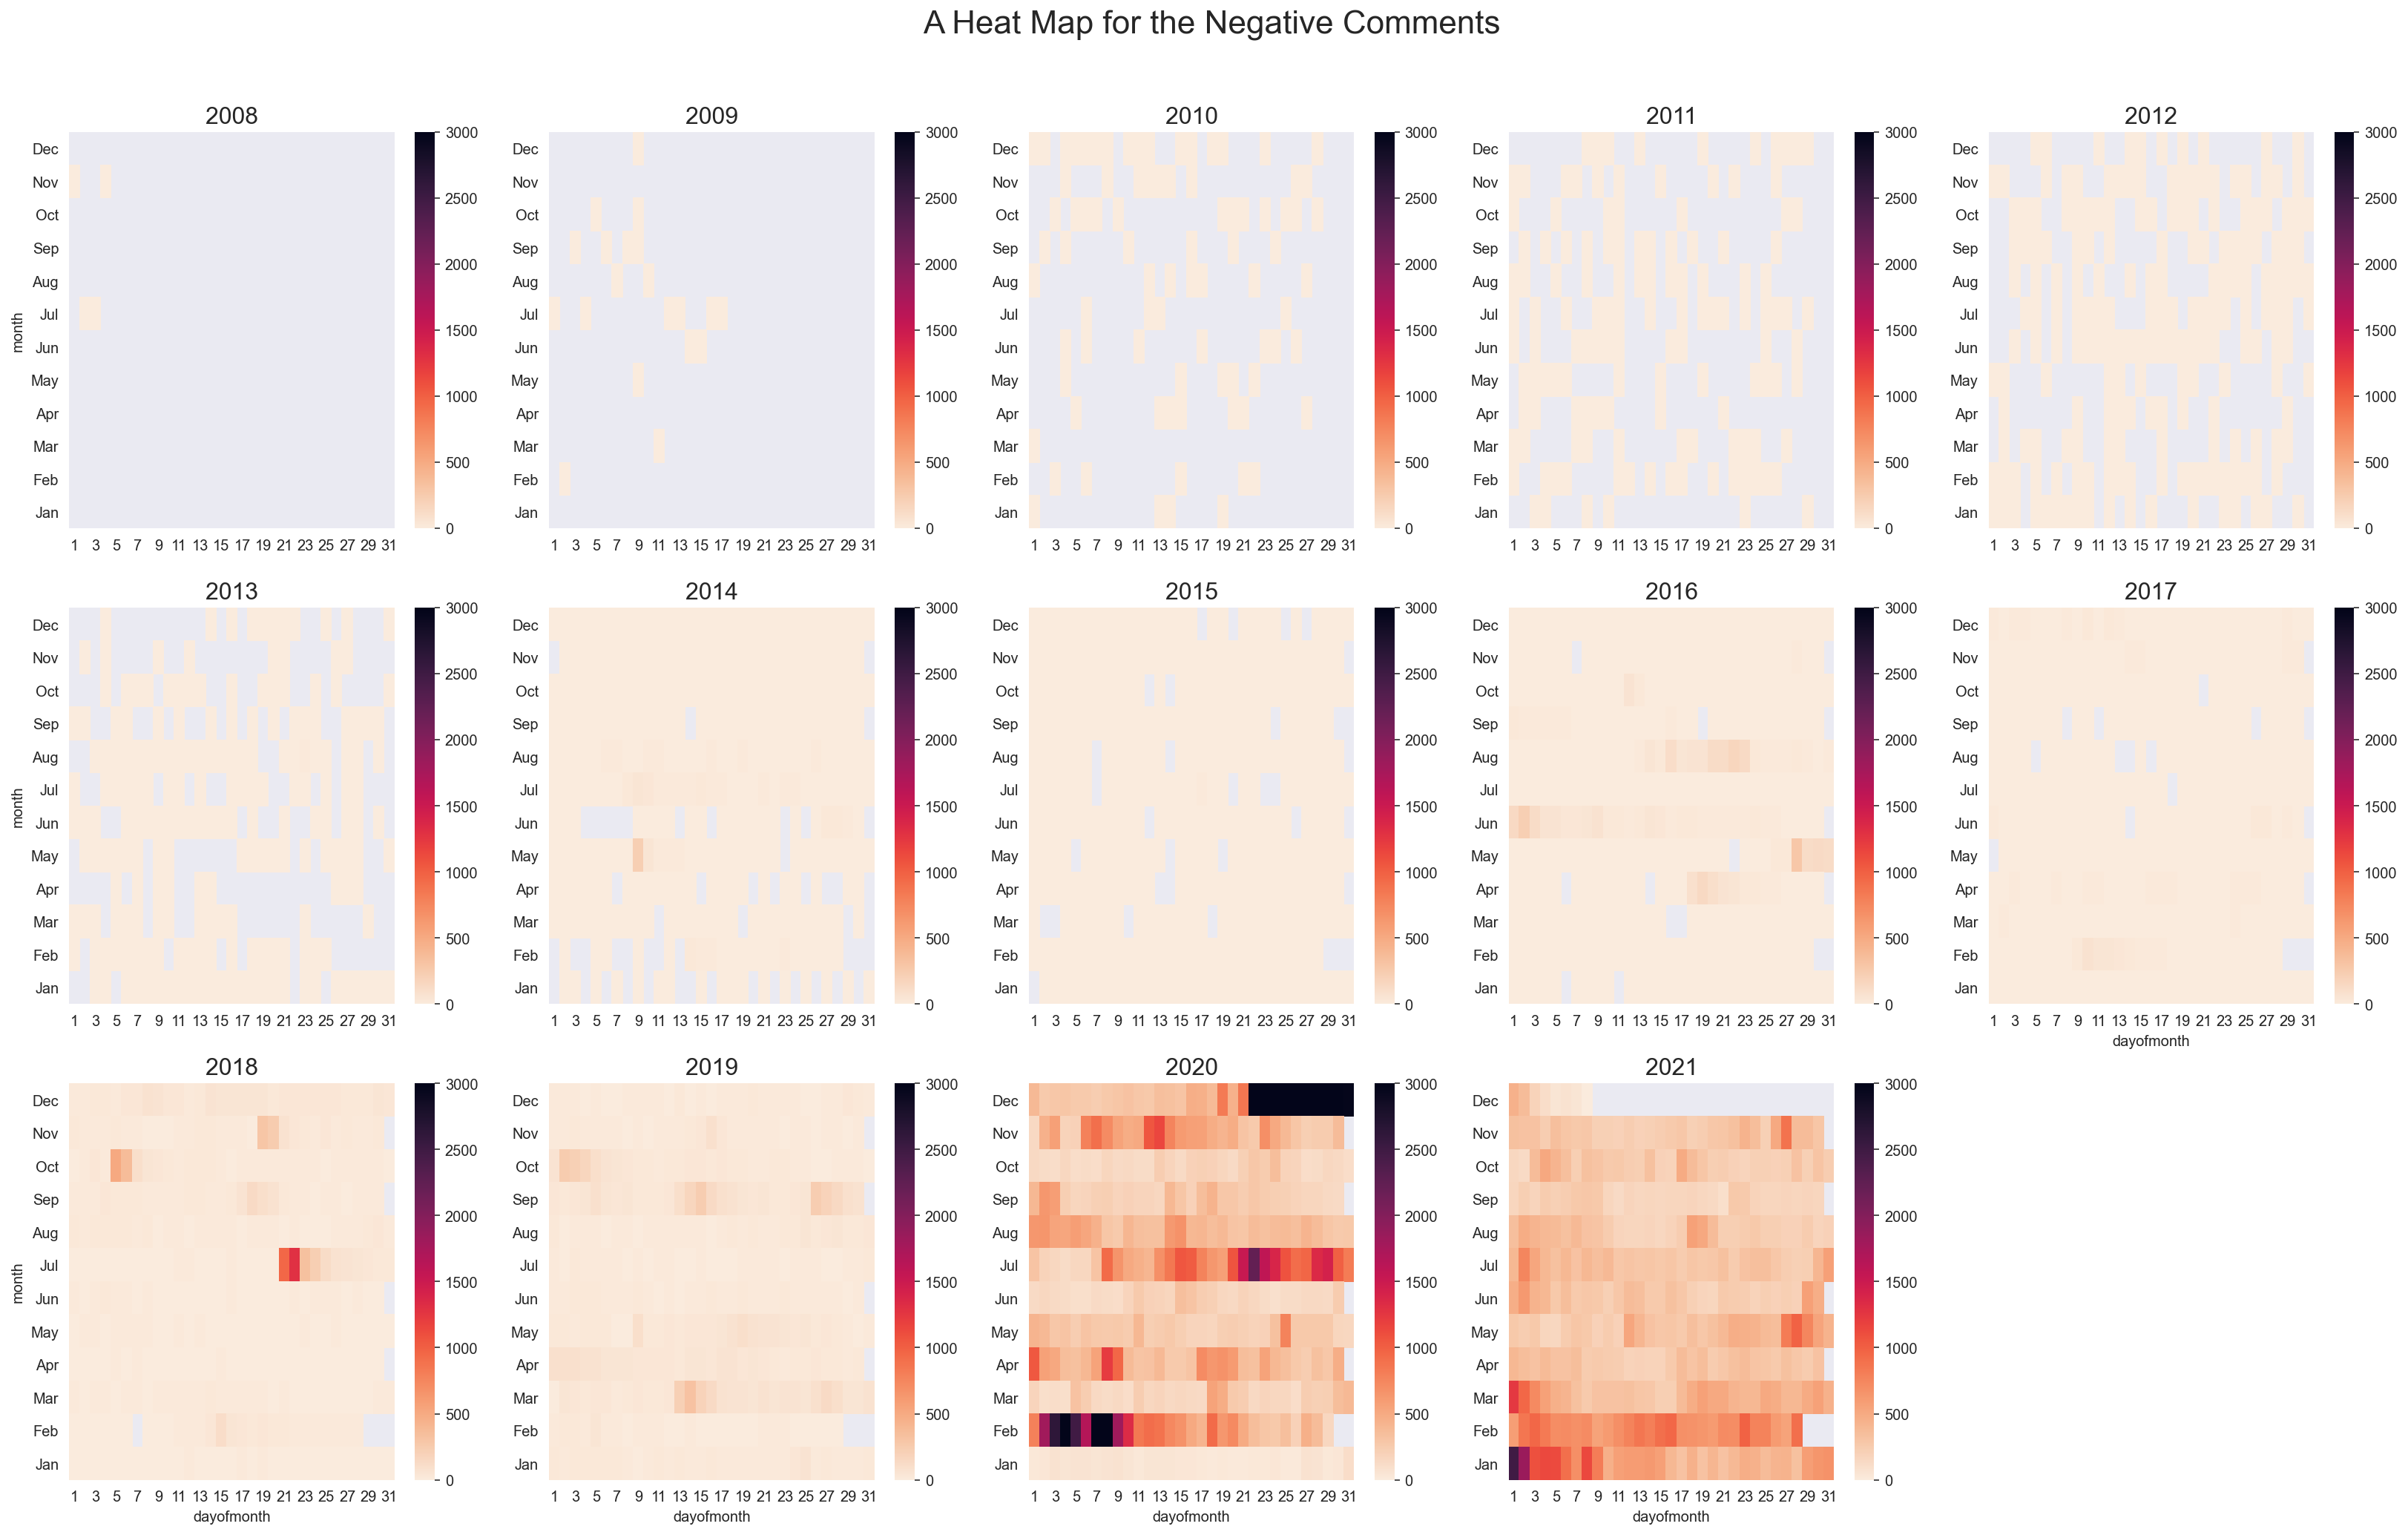

In [76]:
neg_daily = df_neg_total.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='ncomments')

print('\nNote: The Peaks on Feb, Dec 2020\n')
title = 'A Heat Map for the Negative Comments'
helpers.facet_heat(neg_daily, title, n_col=5, vmax=3000)

### A Heat Map for the Negative Users Contributions (All Contributions)

In [77]:
neg_users_list = list(neg_users)

In [78]:
# filter the dataframe on the users commenting in a negative way
df_neg_users = df_comments.query(' username == @neg_users_list ')

In [79]:
print(f'{len(neg_users_list)} Negative Users, {df_neg_users.shape[0]} Contributions')

228339 Negative Users, 993341 Contributions



Note: The Peaks on Feb, Dec 2020



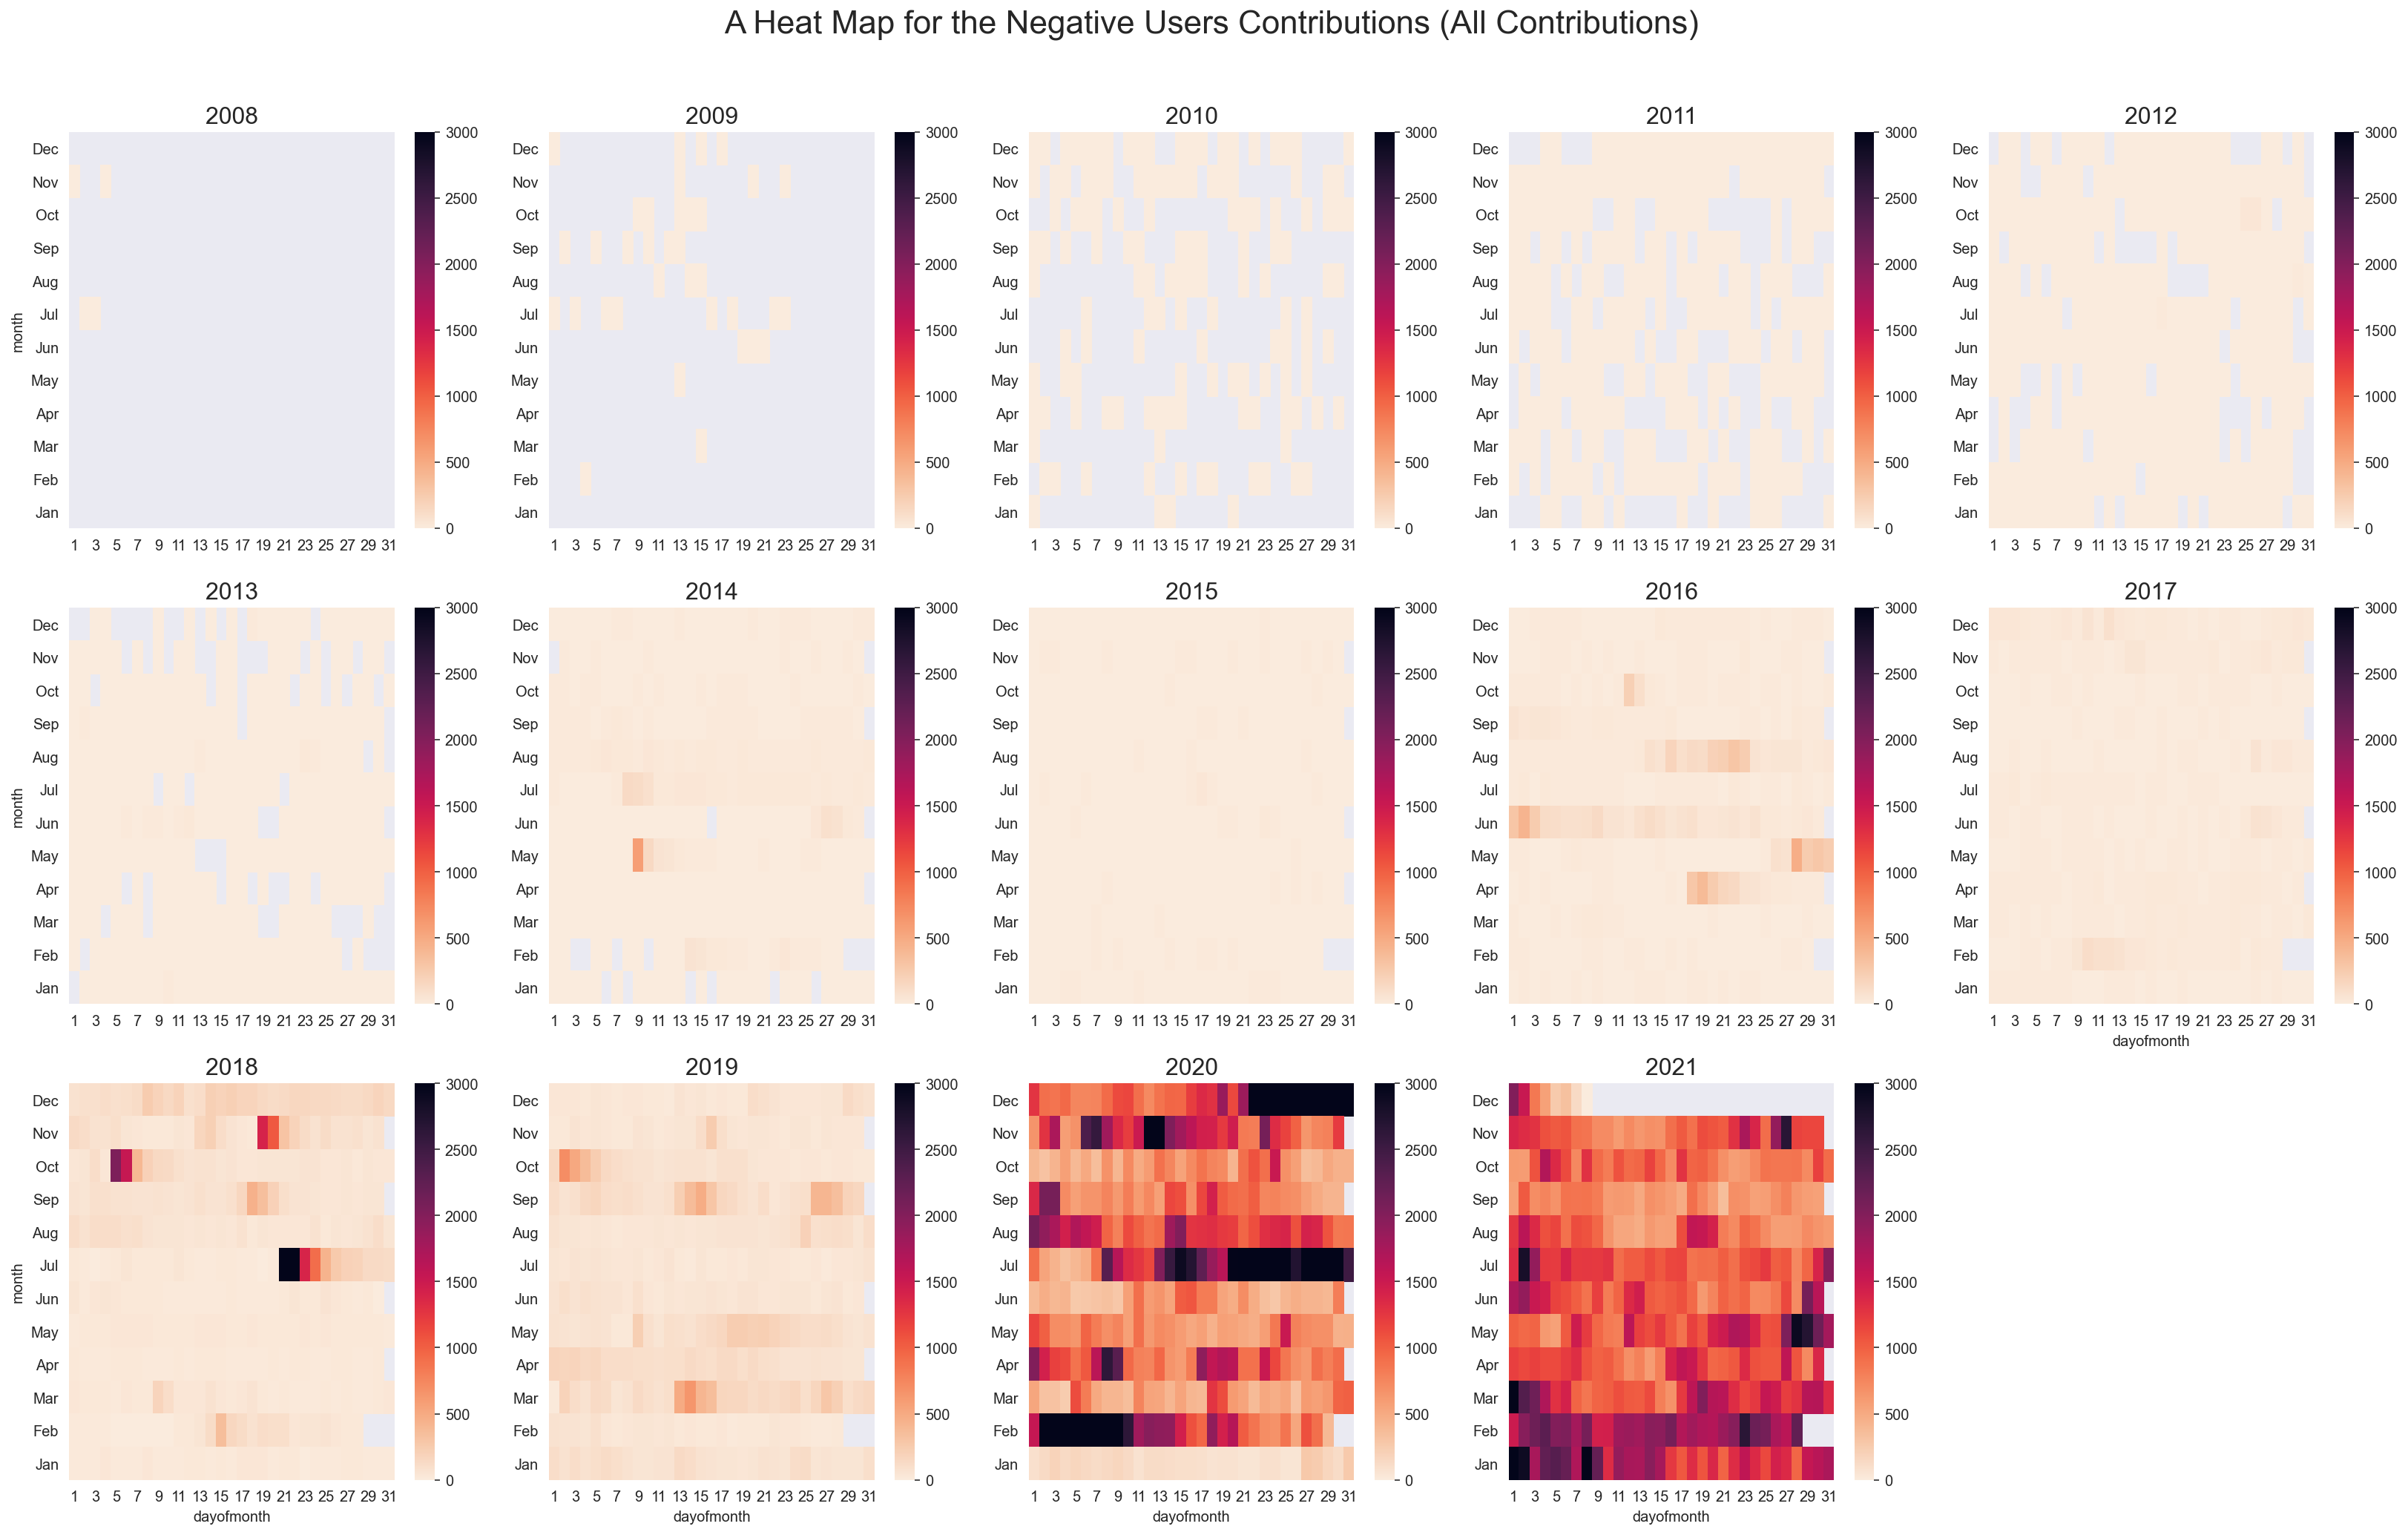

In [80]:
neg_users_daily = df_neg_users.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='ncomments')

print('\nNote: The Peaks on Feb, Dec 2020\n')
title = 'A Heat Map for the Negative Users Contributions (All Contributions)'
helpers.facet_heat(neg_users_daily, title, n_col=5, vmax=3000)

<a id = 'conclusions'></a>
## Conclusions
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions"><b>Conclusions</b></a></li>
</ul>

<a id = 'end'><a/>
# END OF NOTEBOOK

<br>